<a href="https://colab.research.google.com/github/RickyF404/Tesi/blob/main/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gdown

In [2]:
LOF_real = pd.read_csv("/content/drive/MyDrive/LOF_real.csv")
LOF_fake = pd.read_csv("/content/drive/MyDrive/LOF_fake.csv")

DBSCAN_real = pd.read_csv("/content/drive/MyDrive/DBSCAN_real.csv")
DBSCAN_fake = pd.read_csv("/content/drive/MyDrive/DBSCAN_fake.csv")

PCA_real = pd.read_csv("/content/drive/MyDrive/PCA_real.csv")
PCA_fake = pd.read_csv("/content/drive/MyDrive/PCA_fake.csv")

IF_real = pd.read_csv("/content/drive/MyDrive/IF_real.csv")
IF_fake = pd.read_csv("/content/drive/MyDrive/IF_fake.csv")

SVM_real = pd.read_csv("/content/drive/MyDrive/SVM_real.csv")
SVM_fake = pd.read_csv("/content/drive/MyDrive/SVM_fake.csv")

CVAE_beta_1_real = pd.read_csv("/content/drive/MyDrive/CVAE_beta_1_real.csv")
CVAE_beta_1_fake = pd.read_csv("/content/drive/MyDrive/CVAE_beta_1_fake.csv")

CVAE_beta_001_real = pd.read_csv("/content/drive/MyDrive/CVAE_beta_001_real.csv")
CVAE_beta_001_fake = pd.read_csv("/content/drive/MyDrive/CVAE_beta_001_fake.csv")

VAE_no_temp_real = pd.read_csv("/content/drive/MyDrive/VAE_no_temp_real.csv")
VAE_no_temp_fake = pd.read_csv("/content/drive/MyDrive/VAE_no_temp_fake.csv")

VAE_temp_real = pd.read_csv("/content/drive/MyDrive/VAE_temp_real.csv")
VAE_temp_fake = pd.read_csv("/content/drive/MyDrive/VAE_temp_fake.csv")

AE_no_temp_real = pd.read_csv("/content/drive/MyDrive/AE_no_temp_real.csv")
AE_no_temp_fake = pd.read_csv("/content/drive/MyDrive/AE_no_temp_fake.csv")

AE_temp_real = pd.read_csv("/content/drive/MyDrive/AE_temp_real.csv")
AE_temp_fake = pd.read_csv("/content/drive/MyDrive/AE_temp_fake.csv")


# Correlazione tra frequenze e temperatura

In [3]:
url_no_temp = "https://drive.google.com/uc?id=1jerpsOqjogEnnriBkHOrDDEeh1wJry_o"
output_no_temp = "data_no_temperature.csv"
gdown.download(url_no_temp, output_no_temp)

url_temp = " https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH"
output_temp = "data_temperature.csv"
gdown.download(url_temp, output_temp)

Downloading...
From: https://drive.google.com/uc?id=1jerpsOqjogEnnriBkHOrDDEeh1wJry_o
To: /content/data_no_temperature.csv
100%|██████████| 1.44M/1.44M [00:00<00:00, 17.7MB/s]
Downloading...
From:  https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH
To: /content/data_temperature.csv
100%|██████████| 1.66M/1.66M [00:00<00:00, 16.0MB/s]


'data_temperature.csv'

In [4]:
df_temp = pd.read_csv("/content/data_temperature.csv", encoding = "utf-8")
df_temp["timestamp"] = pd.to_datetime(df_temp["timestamp"])
df_temp["timestamp"] = df_temp["timestamp"].dt.tz_localize(None)
df_temp = df_temp.sort_values("timestamp")

In [ ]:
correlation = df_temp.corr(numeric_only = True)["temperatura"].drop("temperatura")
print(correlation)

Mode 1    0.146577
Mode 2    0.141312
Mode 3   -0.632878
Mode 4   -0.407598
Mode 5   -0.082415
Mode 6   -0.186660
Name: temperatura, dtype: float64


Grafico a punti

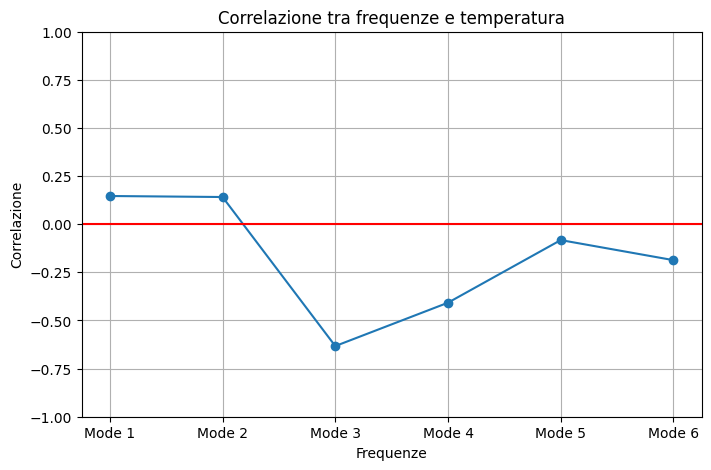

In [ ]:
freq = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
Y = np.linspace(-1, 1, 9)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(freq, correlation, "o-")
ax.set_xticks(freq)
ax.set_yticks(Y)
ax.axhline(0, color="red")
ax.set_title("Correlazione tra frequenze e temperatura")
ax.set_xlabel("Frequenze")
ax.set_ylabel("Correlazione")
ax.grid(True)
plt.show()

Grafico a barre

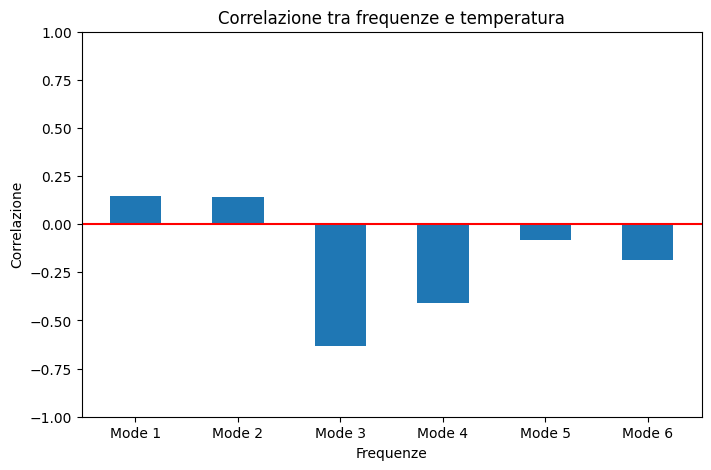

In [ ]:
plt.figure(figsize=(8,5))
plt.ylim(-1 , 1)
plt.bar(correlation.index, correlation.values, width=0.5)
plt.axhline(0, color="red")
plt.ylabel("Correlazione")
plt.xlabel("Frequenze")
plt.title("Correlazione tra frequenze e temperatura")
plt.show()

Heatmap

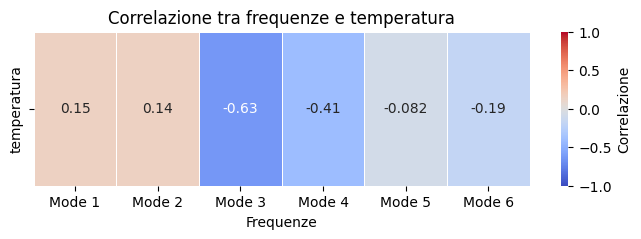

In [ ]:
correlation = df_temp.corr(numeric_only = True)[["temperatura"]].drop("temperatura")

plt.figure(figsize=(8,2))
sns.heatmap(
    correlation.T,
    annot=True,
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
    linewidth=0.5,
    cbar_kws={"label": "Correlazione"}
)
plt.title("Correlazione tra frequenze e temperatura")
plt.xlabel("Frequenze")
plt.ylabel("")
plt.show()

# Grafico 1 (tutti i modelli, dati reali e falsi, 2/4/6 mesi)

Dati reali

In [ ]:
cvae_ridotto = CVAE_beta_001_real[CVAE_beta_001_real["window_size"] != 1]
cvae_beta_1_ridotto = CVAE_beta_1_real[CVAE_beta_1_real["window_size"] != 1]
VAE_no_temp_ridotto = VAE_no_temp_real[VAE_no_temp_real["window_size"] != 1]
VAE_temp_ridotto = VAE_temp_real[VAE_temp_real["window_size"] != 1]
AE_no_temp_ridotto = AE_no_temp_real[AE_no_temp_real["window_size"] != 1]
AE_temp_ridotto = AE_temp_real[AE_temp_real["window_size"] != 1]

real_mean_LOF = LOF_real.groupby("window_size")["anomaly rate 0.01"].mean()
real_mean_DBSCAN = DBSCAN_real.groupby("window_size")["anomaly rate"].mean()
real_mean_PCA = PCA_real.groupby("window_size")["anomaly rate"].mean()
real_mean_IF = IF_real.groupby("window_size")["anomaly rate"].mean()
real_mean_SVM = SVM_real.groupby("window_size")["anomaly rate"].mean()

real_mean_CVAE_beta_001 = cvae_ridotto.groupby("window_size")["anomaly rate"].mean()
real_mean_CVAE_beta_1 = cvae_beta_1_ridotto.groupby("window_size")["anomaly rate"].mean()
real_mean_VAE_no_temp = VAE_no_temp_ridotto.groupby("window_size")["anomaly rate"].mean()
real_mean_VAE_temp = VAE_temp_ridotto.groupby("window_size")["anomaly rate"].mean()
real_mean_AE_no_temp = AE_no_temp_ridotto.groupby("window_size")["anomaly rate"].mean()
real_mean_AE_temp = AE_temp_ridotto.groupby("window_size")["anomaly rate"].mean()

real_std_LOF = LOF_real.groupby("window_size")["anomaly rate 0.01"].std()
real_std_DBSCAN = DBSCAN_real.groupby("window_size")["anomaly rate"].std()
real_std_PCA = PCA_real.groupby("window_size")["anomaly rate"].std()
real_std_IF = IF_real.groupby("window_size")["anomaly rate"].std()
real_std_SVM = SVM_real.groupby("window_size")["anomaly rate"].std()

real_std_CVAE_beta_001 = cvae_ridotto.groupby("window_size")["anomaly rate"].std()
real_std_CVAE_beta_1 = cvae_beta_1_ridotto.groupby("window_size")["anomaly rate"].std()
real_std_VAE_no_temp = VAE_no_temp_ridotto.groupby("window_size")["anomaly rate"].std()
real_std_VAE_temp = VAE_temp_ridotto.groupby("window_size")["anomaly rate"].std()
real_std_AE_no_temp = AE_no_temp_ridotto.groupby("window_size")["anomaly rate"].std()
real_std_AE_temp = AE_temp_ridotto.groupby("window_size")["anomaly rate"].std()

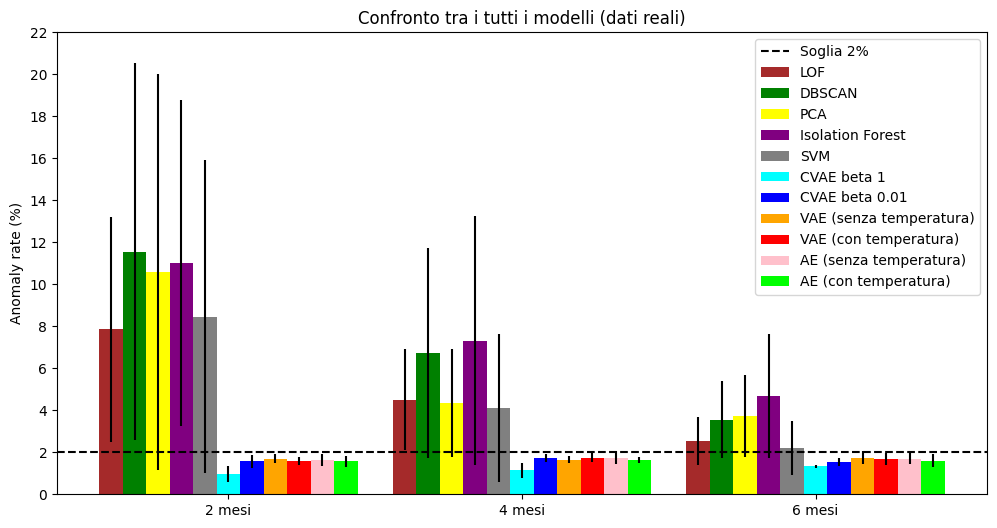

In [ ]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 24, step=2)
fig, ax = plt.subplots(figsize=(12, 6))
w = 0.08
ax.bar(x-5*w, real_mean_LOF.values*100, width=w, yerr=real_std_LOF*100, color="brown", label="LOF")
ax.bar(x-4*w, real_mean_DBSCAN.values*100, width=w, yerr=real_std_DBSCAN*100, color="green", label="DBSCAN")
ax.bar(x-3*w, real_mean_PCA.values*100, width=w, yerr=real_std_PCA*100, color="yellow", label="PCA")
ax.bar(x-2*w, real_mean_IF.values*100, width=w, yerr=real_std_IF*100, color="purple", label="Isolation Forest")
ax.bar(x-w, real_mean_SVM.values*100, width=w, yerr=real_std_SVM*100, color="gray", label="SVM")
ax.bar(x, real_mean_CVAE_beta_1.values*100, width=w, yerr=real_std_CVAE_beta_1*100, color="aqua", label="CVAE beta 1")
ax.bar(x+w, real_mean_CVAE_beta_001.values*100, width=w, yerr=real_std_CVAE_beta_001*100, color="blue", label="CVAE beta 0.01")
ax.bar(x+2*w, real_mean_VAE_no_temp.values*100, width=w, yerr=real_std_VAE_no_temp*100, color="orange", label="VAE (senza temperatura)")
ax.bar(x+3*w, real_mean_VAE_temp.values*100, width=w, yerr=real_std_VAE_temp*100, color="red", label="VAE (con temperatura)")
ax.bar(x+4*w, real_mean_AE_no_temp.values*100, width=w, yerr=real_std_AE_no_temp*100, color="pink", label="AE (senza temperatura)")
ax.bar(x+5*w, real_mean_AE_temp.values*100, width=w, yerr=real_std_AE_temp*100, color="lime", label="AE (con temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i tutti i modelli (dati reali)")
plt.legend()
plt.show()

Solo modelli deep

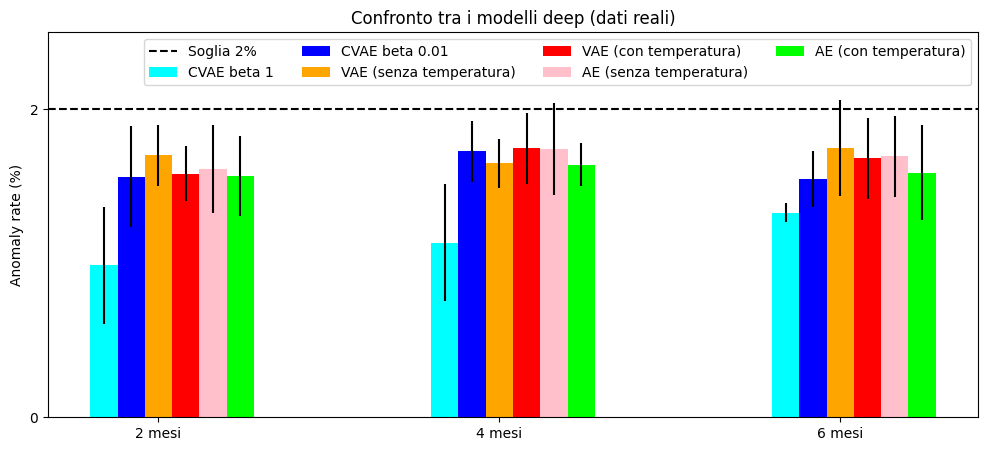

In [ ]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 8, step=2)
fig, ax = plt.subplots(figsize=(12, 5))
w = 0.08
# ax.set_ylim(0.02)


ax.bar(x-2*w, real_mean_CVAE_beta_1.values*100, width=w, yerr=real_std_CVAE_beta_1*100, color="aqua", label="CVAE beta 1")
ax.bar(x-w, real_mean_CVAE_beta_001.values*100, width=w, yerr=real_std_CVAE_beta_001*100, color="blue", label="CVAE beta 0.01")
ax.bar(x, real_mean_VAE_no_temp.values*100, width=w, yerr=real_std_VAE_no_temp*100, color="orange", label="VAE (senza temperatura)")
ax.bar(x+w, real_mean_VAE_temp.values*100, width=w, yerr=real_std_VAE_temp*100, color="red", label="VAE (con temperatura)")
ax.bar(x+2*w, real_mean_AE_no_temp.values*100, width=w, yerr=real_std_AE_no_temp*100, color="pink", label="AE (senza temperatura)")
ax.bar(x+3*w, real_mean_AE_temp.values*100, width=w, yerr=real_std_AE_temp*100, color="lime", label="AE (con temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i modelli deep (dati reali)")
plt.legend(ncol=4)
plt.ylim(0, 2.5)
plt.show()

Dati falsi

In [ ]:
cvae_ridotto_fake = CVAE_beta_001_fake[CVAE_beta_001_fake["window_size"] != 1]
cvae_beta_1_ridotto_fake = CVAE_beta_1_fake[CVAE_beta_1_fake["window_size"] != 1]
VAE_no_temp_ridotto_fake = VAE_no_temp_fake[VAE_no_temp_fake["window_size"] != 1]
VAE_temp_ridotto_fake = VAE_temp_fake[VAE_temp_fake["window_size"] != 1]
AE_no_temp_ridotto_fake = AE_no_temp_fake[AE_no_temp_fake["window_size"] != 1]
AE_temp_ridotto_fake = AE_temp_fake[AE_temp_fake["window_size"] != 1]

fake_mean_LOF = LOF_fake.groupby("window_size")["anomaly"].mean()
fake_mean_DBSCAN = DBSCAN_fake.groupby("window_size")["anomaly"].mean()
fake_mean_PCA = PCA_fake.groupby("window_size")["anomaly"].mean()
fake_mean_IF = IF_fake.groupby("window_size")["anomaly"].mean()
fake_mean_SVM = SVM_fake.groupby("window_size")["anomaly"].mean()

fake_mean_CVAE_beta_001 = cvae_ridotto_fake.groupby("window_size")["anomaly"].mean()
fake_mean_CVAE_beta_1 = cvae_beta_1_ridotto_fake.groupby("window_size")["anomaly"].mean()
fake_mean_VAE_no_temp = VAE_no_temp_ridotto_fake.groupby("window_size")["anomaly"].mean()
fake_mean_VAE_temp = VAE_temp_ridotto_fake.groupby("window_size")["anomaly"].mean()
fake_mean_AE_no_temp = AE_no_temp_ridotto_fake.groupby("window_size")["anomaly"].mean()
fake_mean_AE_temp = AE_temp_ridotto_fake.groupby("window_size")["anomaly"].mean()

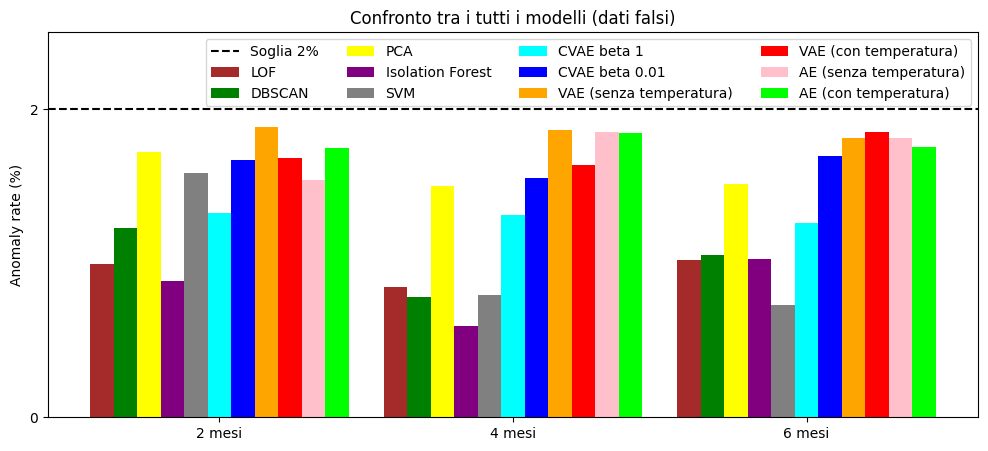

In [ ]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 10, step=2)
fig, ax = plt.subplots(figsize=(12, 5))
w = 0.08
ax.bar(x-5*w, fake_mean_LOF.values*100, width=w, color="brown", label="LOF")
ax.bar(x-4*w, fake_mean_DBSCAN.values*100, width=w, color="green", label="DBSCAN")
ax.bar(x-3*w, fake_mean_PCA.values*100, width=w, color="yellow", label="PCA")
ax.bar(x-2*w, fake_mean_IF.values*100, width=w, color="purple", label="Isolation Forest")
ax.bar(x-w, fake_mean_SVM.values*100, width=w, color="gray", label="SVM")
ax.bar(x, fake_mean_CVAE_beta_1.values*100, width=w, color="aqua", label="CVAE beta 1")
ax.bar(x+w, fake_mean_CVAE_beta_001.values*100, width=w, color="blue", label="CVAE beta 0.01")
ax.bar(x+2*w, fake_mean_VAE_no_temp.values*100, width=w, color="orange", label="VAE (senza temperatura)")
ax.bar(x+3*w, fake_mean_VAE_temp.values*100, width=w, color="red", label="VAE (con temperatura)")
ax.bar(x+4*w, fake_mean_AE_no_temp.values*100, width=w, color="pink", label="AE (senza temperatura)")
ax.bar(x+5*w, fake_mean_AE_temp.values*100, width=w, color="lime", label="AE (con temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i tutti i modelli (dati falsi)")
plt.legend(ncol = 4)
plt.ylim(0, 2.5)
plt.show()

# Grafico 2 (tutti i modelli, dati reali, 2 mesi)

In [ ]:
LOF_2m = LOF_real[LOF_real["window_size"] == 2]
DBSCAN_2m = DBSCAN_real[DBSCAN_real["window_size"] == 2]
PCA_2m = PCA_real[PCA_real["window_size"] == 2]
IF_2m = IF_real[IF_real["window_size"] == 2]
SVM_2m = SVM_real[SVM_real["window_size"] == 2]
cvae_2m = CVAE_beta_001_real[CVAE_beta_001_real["window_size"] == 2]
cvae_beta1_2m = CVAE_beta_1_real[CVAE_beta_1_real["window_size"] == 2]
VAE_no_temp_2m = VAE_no_temp_real[VAE_no_temp_real["window_size"] == 2]
VAE_temp_2m = VAE_temp_real[VAE_temp_real["window_size"] == 2]
AE_no_temp_2m = AE_no_temp_real[AE_no_temp_real["window_size"] == 2]
AE_temp_2m = AE_temp_real[AE_temp_real["window_size"] == 2]

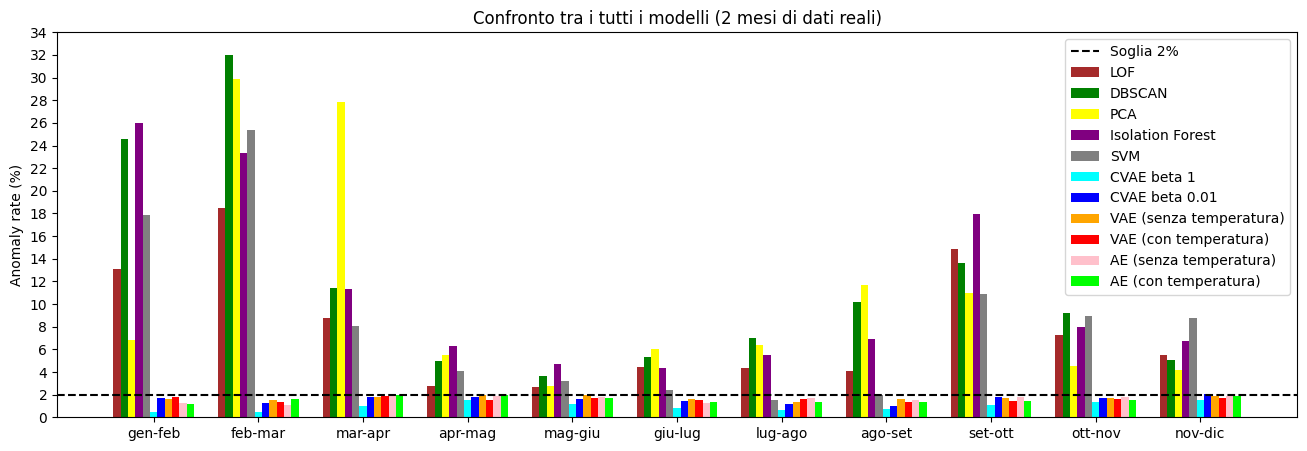

In [ ]:
labels = ["gen-feb", "feb-mar", "mar-apr", "apr-mag", "mag-giu", "giu-lug", "lug-ago", "ago-set", "set-ott", "ott-nov", "nov-dic"]
x = np.arange(len(labels))
y = np.arange(0, 36, step=2)
fig, ax = plt.subplots(figsize=(16, 5))
w = 0.07
ax.bar(x-5*w, LOF_2m["anomaly rate 0.01"].values*100, width=w, color="brown", label="LOF")
ax.bar(x-4*w, DBSCAN_2m["anomaly rate"].values*100, width=w, color="green", label="DBSCAN")
ax.bar(x-3*w, PCA_2m["anomaly rate"].values*100, width=w, color="yellow", label="PCA")
ax.bar(x-2*w, IF_2m["anomaly rate"].values*100, width=w, color="purple", label="Isolation Forest")
ax.bar(x-w, SVM_2m["anomaly rate"].values*100, width=w, color="gray", label="SVM")
ax.bar(x, cvae_beta1_2m["anomaly rate"].values*100, width=w, color="aqua", label="CVAE beta 1")
ax.bar(x+w, cvae_2m["anomaly rate"].values*100, width=w, color="blue", label="CVAE beta 0.01")
ax.bar(x+2*w, VAE_no_temp_2m["anomaly rate"].values*100, width=w, color="orange", label="VAE (senza temperatura)")
ax.bar(x+3*w, VAE_temp_2m["anomaly rate"].values*100, width=w, color="red", label="VAE (con temperatura)")
ax.bar(x+4*w, AE_no_temp_2m["anomaly rate"].values*100, width=w, color="pink", label="AE (senza temperatura)")
ax.bar(x+5*w, AE_temp_2m["anomaly rate"].values*100, width=w, color="lime", label="AE (con temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i tutti i modelli (2 mesi di dati reali)")
plt.legend()
plt.show()

# Grafico 3 (tutti i modelli, dati reali, 4 mesi)

In [ ]:
LOF_4m = LOF_real[LOF_real["window_size"] == 4]
DBSCAN_4m = DBSCAN_real[DBSCAN_real["window_size"] == 4]
PCA_4m = PCA_real[PCA_real["window_size"] == 4]
IF_4m = IF_real[IF_real["window_size"] == 4]
SVM_4m = SVM_real[SVM_real["window_size"] == 4]
cvae_4m = CVAE_beta_001_real[CVAE_beta_001_real["window_size"] == 4]
cvae_beta1_4m = CVAE_beta_1_real[CVAE_beta_1_real["window_size"] == 4]
VAE_no_temp_4m = VAE_no_temp_real[VAE_no_temp_real["window_size"] == 4]
VAE_temp_4m = VAE_temp_real[VAE_temp_real["window_size"] == 4]
AE_no_temp_4m = AE_no_temp_real[AE_no_temp_real["window_size"] == 4]
AE_temp_4m = AE_temp_real[AE_temp_real["window_size"] == 4]

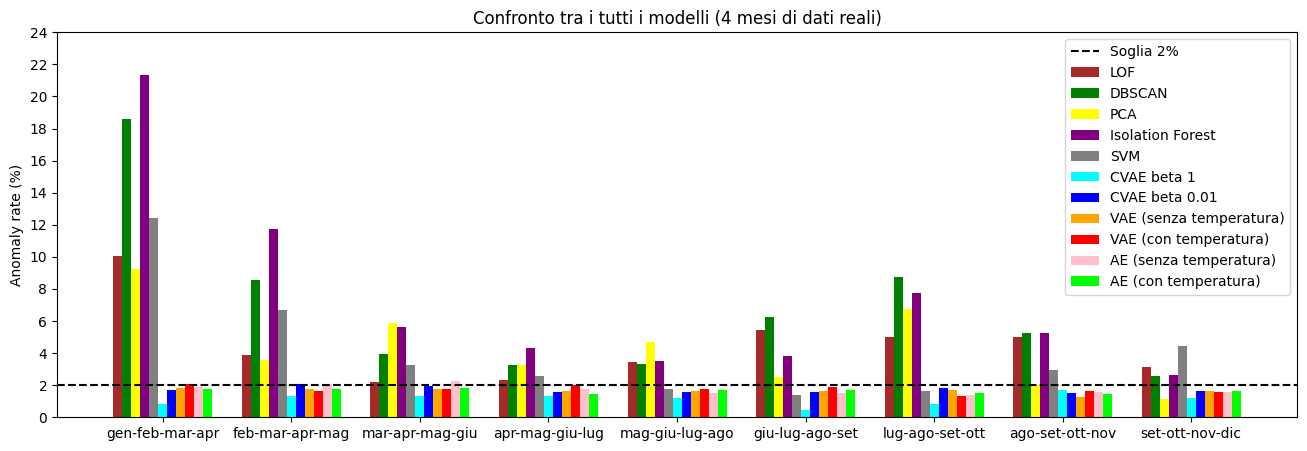

In [ ]:
labels = ["gen-feb-mar-apr", "feb-mar-apr-mag", "mar-apr-mag-giu", "apr-mag-giu-lug", "mag-giu-lug-ago", "giu-lug-ago-set", "lug-ago-set-ott", "ago-set-ott-nov", "set-ott-nov-dic"]
x = np.arange(len(labels))
y = np.arange(0, 26, step=2)
fig, ax = plt.subplots(figsize=(16, 5))
w = 0.07
ax.bar(x-5*w, LOF_4m["anomaly rate 0.01"].values*100, width=w, color="brown", label="LOF")
ax.bar(x-4*w, DBSCAN_4m["anomaly rate"].values*100, width=w, color="green", label="DBSCAN")
ax.bar(x-3*w, PCA_4m["anomaly rate"].values*100, width=w, color="yellow", label="PCA")
ax.bar(x-2*w, IF_4m["anomaly rate"].values*100, width=w, color="purple", label="Isolation Forest")
ax.bar(x-w, SVM_4m["anomaly rate"].values*100, width=w, color="gray", label="SVM")
ax.bar(x, cvae_beta1_4m["anomaly rate"].values*100, width=w, color="aqua", label="CVAE beta 1")
ax.bar(x+w, cvae_4m["anomaly rate"].values*100, width=w, color="blue", label="CVAE beta 0.01")
ax.bar(x+2*w, VAE_no_temp_4m["anomaly rate"].values*100, width=w, color="orange", label="VAE (senza temperatura)")
ax.bar(x+3*w, VAE_temp_4m["anomaly rate"].values*100, width=w, color="red", label="VAE (con temperatura)")
ax.bar(x+4*w, AE_no_temp_4m["anomaly rate"].values*100, width=w, color="pink", label="AE (senza temperatura)")
ax.bar(x+5*w, AE_temp_4m["anomaly rate"].values*100, width=w, color="lime", label="AE (con temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i tutti i modelli (4 mesi di dati reali)")
plt.legend()
plt.show()

# Grafico 4 (tutti i modelli, dati reali, 6 mesi)

In [ ]:
LOF_6m = LOF_real[LOF_real["window_size"] == 6]
DBSCAN_6m = DBSCAN_real[DBSCAN_real["window_size"] == 6]
PCA_6m = PCA_real[PCA_real["window_size"] == 6]
IF_6m = IF_real[IF_real["window_size"] == 6]
SVM_6m = SVM_real[SVM_real["window_size"] == 6]
cvae_6m = CVAE_beta_001_real[CVAE_beta_001_real["window_size"] == 6]
cvae_beta1_6m = CVAE_beta_1_real[CVAE_beta_1_real["window_size"] == 6]
VAE_no_temp_6m = VAE_no_temp_real[VAE_no_temp_real["window_size"] == 6]
VAE_temp_6m = VAE_temp_real[VAE_temp_real["window_size"] == 6]
AE_no_temp_6m = AE_no_temp_real[AE_no_temp_real["window_size"] == 6]
AE_temp_6m = AE_temp_real[AE_temp_real["window_size"] == 6]

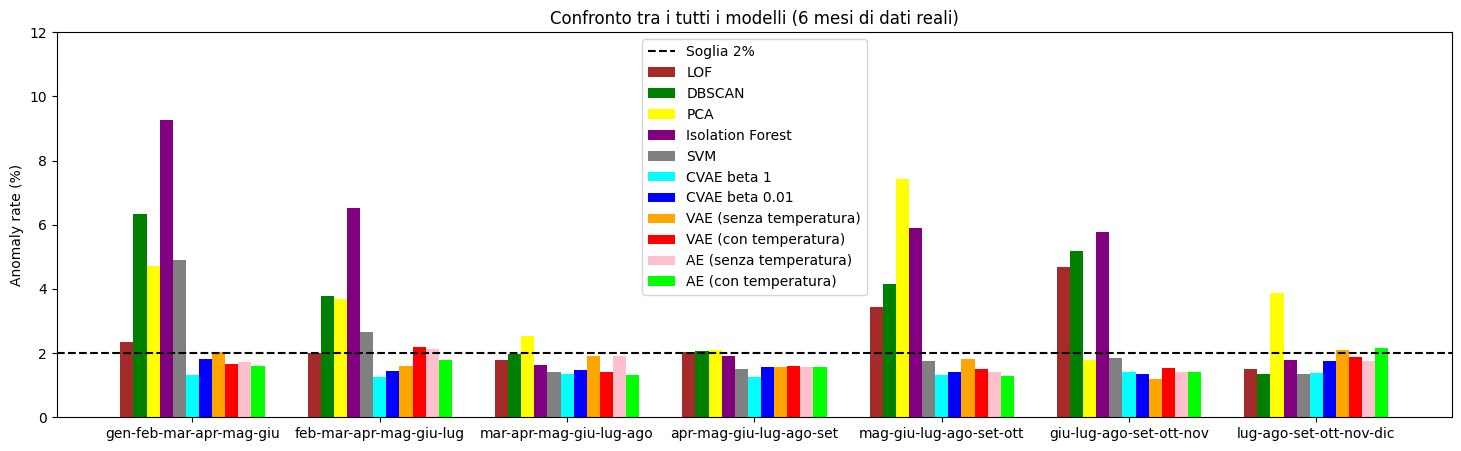

In [ ]:
labels = ["gen-feb-mar-apr-mag-giu", "feb-mar-apr-mag-giu-lug", "mar-apr-mag-giu-lug-ago", "apr-mag-giu-lug-ago-set", "mag-giu-lug-ago-set-ott", "giu-lug-ago-set-ott-nov", "lug-ago-set-ott-nov-dic"]
x = np.arange(len(labels))
y = np.arange(0, 14, step=2)
fig, ax = plt.subplots(figsize=(18, 5))
w = 0.07
ax.bar(x-5*w, LOF_6m["anomaly rate 0.01"].values*100, width=w, color="brown", label="LOF")
ax.bar(x-4*w, DBSCAN_6m["anomaly rate"].values*100, width=w, color="green", label="DBSCAN")
ax.bar(x-3*w, PCA_6m["anomaly rate"].values*100, width=w, color="yellow", label="PCA")
ax.bar(x-2*w, IF_6m["anomaly rate"].values*100, width=w, color="purple", label="Isolation Forest")
ax.bar(x-w, SVM_6m["anomaly rate"].values*100, width=w, color="gray", label="SVM")
ax.bar(x, cvae_beta1_6m["anomaly rate"].values*100, width=w, color="aqua", label="CVAE beta 1")
ax.bar(x+w, cvae_6m["anomaly rate"].values*100, width=w, color="blue", label="CVAE beta 0.01")
ax.bar(x+2*w, VAE_no_temp_6m["anomaly rate"].values*100, width=w, color="orange", label="VAE (senza temperatura)")
ax.bar(x+3*w, VAE_temp_6m["anomaly rate"].values*100, width=w, color="red", label="VAE (con temperatura)")
ax.bar(x+4*w, AE_no_temp_6m["anomaly rate"].values*100, width=w, color="pink", label="AE (senza temperatura)")
ax.bar(x+5*w, AE_temp_6m["anomaly rate"].values*100, width=w, color="lime", label="AE (con temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i tutti i modelli (6 mesi di dati reali)")
plt.legend()
plt.show()

# Grafico 5 (solo i modelli deep, dati reali, 1 mese)

In [ ]:
cvae_beta_1_1m = CVAE_beta_1_real[CVAE_beta_1_real["window_size"] == 1]
cvae_beta_001_1m = CVAE_beta_001_real[CVAE_beta_001_real["window_size"] == 1]
VAE_no_temp_1m = VAE_no_temp_real[VAE_no_temp_real["window_size"] == 1]
VAE_temp_1m = VAE_temp_real[VAE_temp_real["window_size"] == 1]
AE_no_temp_1m = AE_no_temp_real[AE_no_temp_real["window_size"] == 1]
AE_temp_1m = AE_temp_real[AE_temp_real["window_size"] == 1]

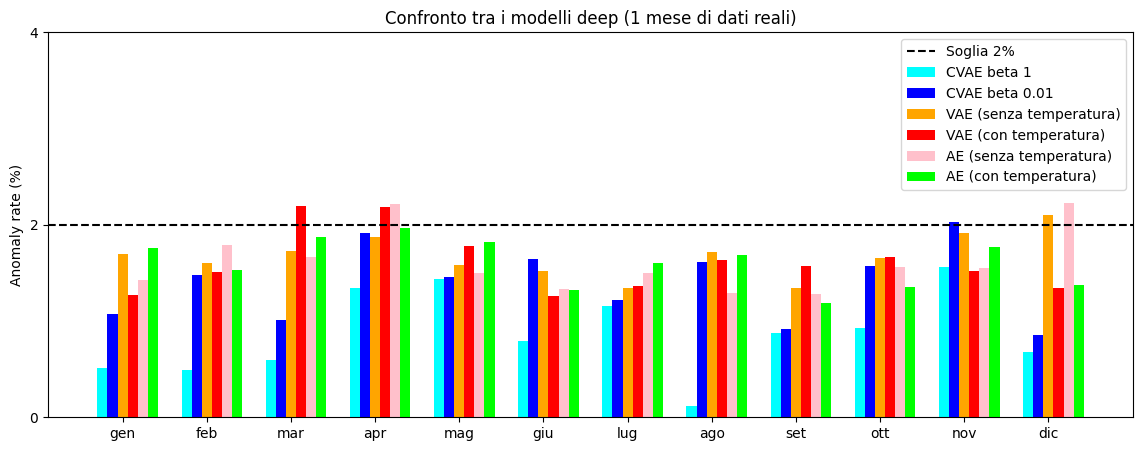

In [ ]:
labels = ["gen", "feb", "mar", "apr", "mag", "giu", "lug", "ago", "set", "ott", "nov", "dic"]
x = np.arange(len(labels))
y = np.arange(0, 6, step=2)
fig, ax = plt.subplots(figsize=(14, 5))
w = 0.12

ax.bar(x-2*w, cvae_beta_1_1m["anomaly rate"].values*100, width=w, color="aqua", label="CVAE beta 1")
ax.bar(x-w, cvae_beta_001_1m["anomaly rate"].values*100, width=w, color="blue", label="CVAE beta 0.01")
ax.bar(x, VAE_no_temp_1m["anomaly rate"].values*100, width=w, color="orange", label="VAE (senza temperatura)")
ax.bar(x+w, VAE_temp_1m["anomaly rate"].values*100, width=w, color="red", label="VAE (con temperatura)")
ax.bar(x+2*w, AE_no_temp_1m["anomaly rate"].values*100, width=w, color="pink", label="AE (senza temperatura)")
ax.bar(x+3*w, AE_temp_1m["anomaly rate"].values*100, width=w, color="lime", label="AE (con temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i modelli deep (1 mese di dati reali)")
plt.legend()
plt.show()

# Confronto tra CVAE beta 1 e CVAE beta 0.01 (dati reali e falsi)

In [ ]:
real_mean_CVAE_beta_001_full = CVAE_beta_001_real.groupby("window_size")["anomaly rate"].mean()
real_mean_CVAE_beta_1_full = CVAE_beta_1_real.groupby("window_size")["anomaly rate"].mean()

real_std_CVAE_beta_001_full = CVAE_beta_001_real.groupby("window_size")["anomaly rate"].std()
real_std_CVAE_beta_1_full = CVAE_beta_1_real.groupby("window_size")["anomaly rate"].std()

Dati reali

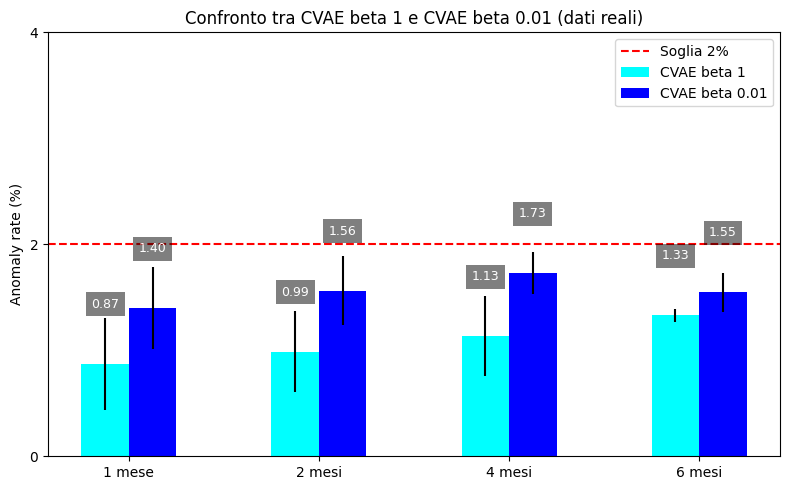

In [ ]:
labels = ["1 mese", "2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 6, step=2)
fig, ax = plt.subplots(figsize=(8, 5))
w = 0.25

bars1 = ax.bar(x-w/2, real_mean_CVAE_beta_1_full.values*100, width=w, yerr=real_std_CVAE_beta_1_full*100, color="aqua", label="CVAE beta 1")
bars2 = ax.bar(x+w/2, real_mean_CVAE_beta_001_full.values*100, width=w, yerr=real_std_CVAE_beta_001_full*100, color="blue", label="CVAE beta 0.01")

ax.axhline(2, color="red", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra CVAE beta 1 e CVAE beta 0.01 (dati reali)")
plt.legend()

def add_labels(bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="white",
        bbox = dict(facecolor="black", alpha=0.5, edgecolor="none")
    )

add_labels(bars1)
add_labels(bars2)
plt.tight_layout()
plt.show()

Dati falsi

In [ ]:
fake_mean_CVAE_beta_001_full = CVAE_beta_001_fake.groupby("window_size")["anomaly"].mean()
fake_mean_CVAE_beta_1_full = CVAE_beta_1_fake.groupby("window_size")["anomaly"].mean()

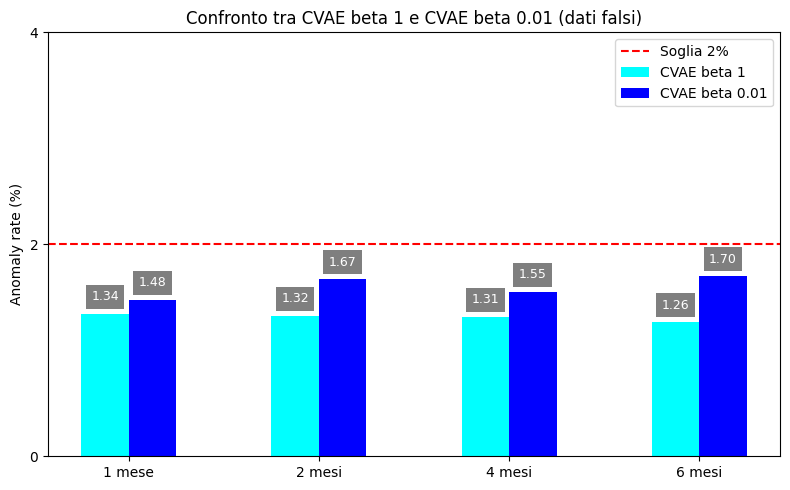

In [ ]:
labels = ["1 mese", "2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 6, step=2)
fig, ax = plt.subplots(figsize=(8, 5))
w = 0.25

bars1 = ax.bar(x-w/2, fake_mean_CVAE_beta_1_full.values*100, width=w, color="aqua", label="CVAE beta 1")
bars2 = ax.bar(x+w/2, fake_mean_CVAE_beta_001_full.values*100, width=w, color="blue", label="CVAE beta 0.01")

ax.axhline(2, color="red", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra CVAE beta 1 e CVAE beta 0.01 (dati falsi)")
plt.legend()

def add_labels(bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.1,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="white",
        bbox = dict(facecolor="black", alpha=0.5, edgecolor="none")
    )

add_labels(bars1)
add_labels(bars2)
plt.tight_layout()
plt.show()

# Analisi temperatura mensile

Temperatura media, mediana, massima e minima

In [4]:
url_temp = " https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH"
output_temp = "data_temperature.csv"
gdown.download(url_temp, output_temp)

Downloading...
From:  https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH
To: /content/data_temperature.csv
100%|██████████| 1.66M/1.66M [00:00<00:00, 141MB/s]


'data_temperature.csv'

In [5]:
df_temp = pd.read_csv("/content/data_temperature.csv", encoding = "utf-8")
df_temp["timestamp"] = pd.to_datetime(df_temp["timestamp"])
df_temp["timestamp"] = df_temp["timestamp"].dt.tz_localize(None)
df_temp = df_temp.sort_values("timestamp")

end_date = "2025-01-01"
df = df_temp[df_temp["timestamp"] < end_date]

temp_avg = df.groupby(df["timestamp"].dt.month)["temperatura"].mean()
temp_max = df.groupby(df["timestamp"].dt.month)["temperatura"].max()
temp_min = df.groupby(df["timestamp"].dt.month)["temperatura"].min()
temp_median = df.groupby(df["timestamp"].dt.month)["temperatura"].median()
print("temperatura media:", temp_avg, "\n")
print("temperatura massima:", temp_max, "\n")
print("temperatura minima:", temp_min, "\n")
print("temperatura mediana:", temp_median, "\n")

temperatura media: timestamp
1     12.126282
2     13.292488
3     15.238918
4     18.606741
5     22.074594
6     26.871295
7     31.509580
8     32.167576
9     25.252816
10    21.480224
11    15.853651
12    11.501519
Name: temperatura, dtype: float64 

temperatura massima: timestamp
1     18.603085
2     19.029917
3     23.671121
4     27.771809
5     29.598025
6     35.989617
7     38.777520
8     39.536632
9     34.927588
10    26.127871
11    23.024952
12    16.135025
Name: temperatura, dtype: float64 

temperatura minima: timestamp
1      6.980165
2      7.921371
3      9.878445
4     11.754597
5     14.985103
6     19.985833
7     24.504193
8     26.384351
9     18.876069
10    17.397043
11     8.412779
12     7.699968
Name: temperatura, dtype: float64 

temperatura mediana: timestamp
1     11.996201
2     13.039039
3     15.132782
4     18.192804
5     21.913757
6     26.510781
7     31.127388
8     31.721994
9     24.840656
10    21.296100
11    16.004572
12    11.453745
Nam

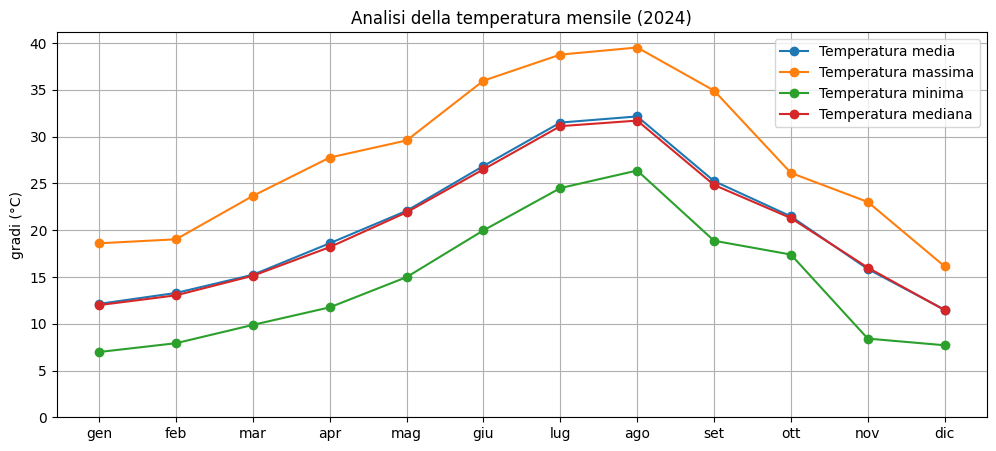

In [ ]:
labels = ["gen", "feb", "mar", "apr", "mag", "giu", "lug", "ago", "set", "ott", "nov", "dic"]
y = np.arange(0, 45, step=5)
x = np.arange(1, len(labels)+1)

figure, ax = plt.subplots(figsize=(12, 5))
ax.plot(temp_avg.index, temp_avg.values, "o-", label="Temperatura media")
ax.plot(temp_max.index, temp_max.values, "o-", label="Temperatura massima")
ax.plot(temp_min.index, temp_min.values, "o-", label="Temperatura minima")
ax.plot(temp_median.index, temp_median.values, "o-", label="Temperatura mediana")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("gradi (°C)")
plt.legend()
plt.title("Analisi della temperatura mensile (2024)")
plt.grid(True)
plt.show()

Media delle escursioni termiche giornaliere

In [ ]:
daily_amp = df.groupby(df["timestamp"].dt.date)["temperatura"].agg(lambda x: x.max()- x.min())

monthly_amp_mean = daily_amp.groupby(pd.to_datetime(daily_amp.index).to_period("M")).mean()

print(monthly_amp_mean)

timestamp
2024-01    4.087587
2024-02    5.145328
2024-03    5.137622
2024-04    6.739853
2024-05    6.228330
2024-06    6.726246
2024-07    7.300671
2024-08    7.355684
2024-09    5.781298
2024-10    4.820280
2024-11    4.619887
2024-12    4.026756
Freq: M, Name: temperatura, dtype: float64


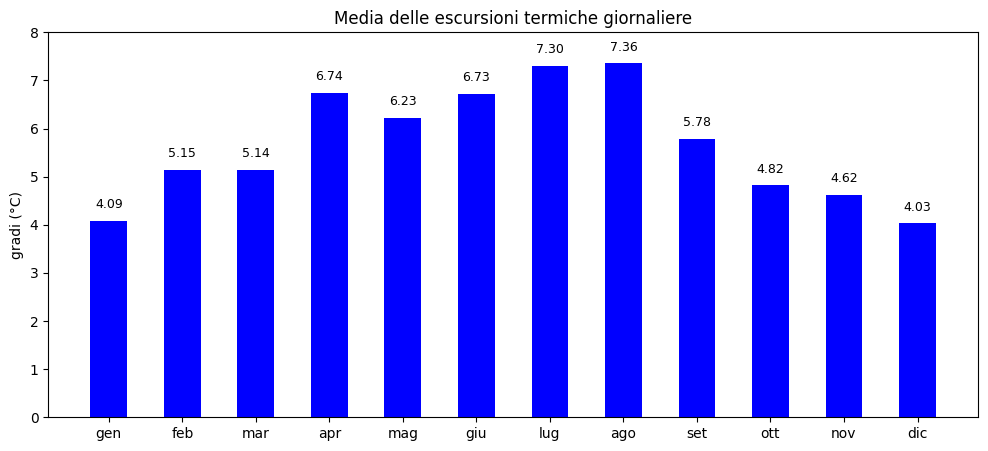

In [ ]:
labels = ["gen", "feb", "mar", "apr", "mag", "giu", "lug", "ago", "set", "ott", "nov", "dic"]
y = np.arange(0, 9)
x = np.arange(len(labels))

figure, ax = plt.subplots(figsize=(12, 5))
bars1 = ax.bar(labels, monthly_amp_mean, width=0.5, color="blue")
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_ylabel("gradi (°C)")
plt.title("Media delle escursioni termiche giornaliere")

def add_labels(bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.2,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="black",
    )

add_labels(bars1)
plt.show()

Escursioni termiche mensili

In [ ]:
m_amp = df.groupby(df["timestamp"].dt.month)["temperatura"].agg(lambda x: x.max() - x.min())
print(m_amp)

timestamp
1     11.622921
2     11.108546
3     13.792676
4     16.017212
5     14.612922
6     16.003784
7     14.273327
8     13.152282
9     16.051519
10     8.730828
11    14.612173
12     8.435057
Name: temperatura, dtype: float64


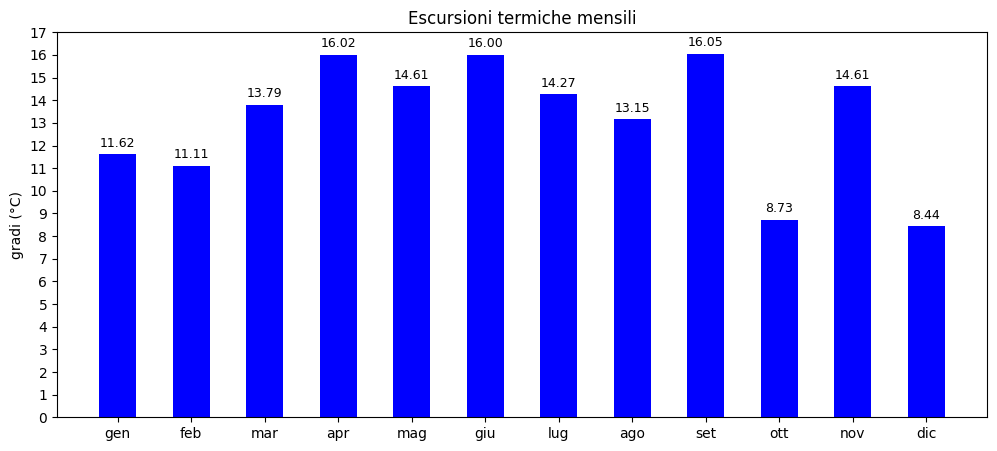

In [ ]:
labels = ["gen", "feb", "mar", "apr", "mag", "giu", "lug", "ago", "set", "ott", "nov", "dic"]
y = np.arange(0, 18)
x = np.arange(len(labels))

figure, ax = plt.subplots(figsize=(12, 5))
bars1 = ax.bar(labels, m_amp, width=0.5, color="blue")
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_ylabel("gradi (°C)")
plt.title("Escursioni termiche mensili")

def add_labels(bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.2,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="black",
    )

add_labels(bars1)
plt.show()

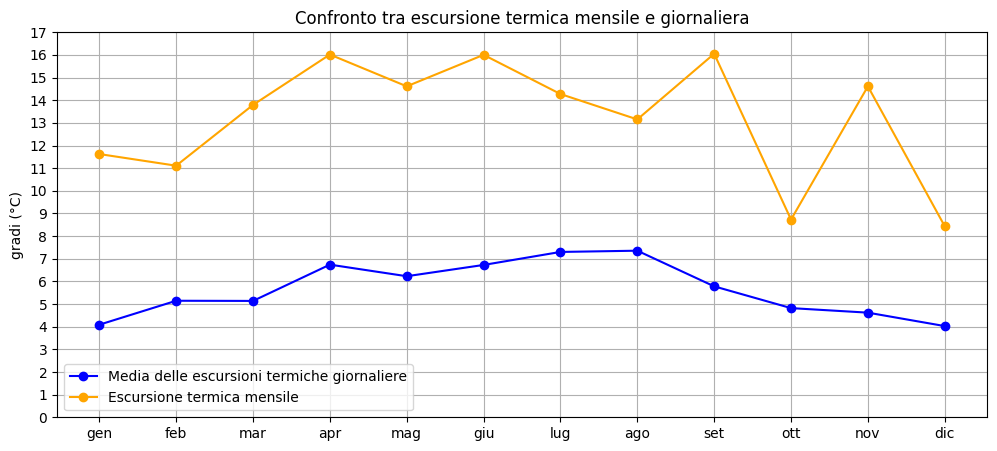

In [ ]:
labels = ["gen", "feb", "mar", "apr", "mag", "giu", "lug", "ago", "set", "ott", "nov", "dic"]
y = np.arange(0, 18)
x = np.arange(len(labels))

figure, ax = plt.subplots(figsize=(12, 5))
ax.plot(labels, monthly_amp_mean, "o-", label="Media delle escursioni termiche giornaliere", color="blue")
ax.plot(labels, m_amp, "o-", label="Escursione termica mensile", color="orange")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("gradi (°C)")
plt.legend()
plt.title("Confronto tra escursione termica mensile e giornaliera")
plt.grid(True)
plt.legend()
plt.show()

# Dataset inclinometro

In [ ]:
LOF_real_inc = pd.read_csv("/content/drive/MyDrive/real_inclinometri_LOF.csv")
LOF_fake_inc = pd.read_csv("/content/drive/MyDrive/fake_inclinometri_LOF.csv")

PCA_real_inc = pd.read_csv("/content/drive/MyDrive/real_inclinometri_PCA.csv")
PCA_fake_inc = pd.read_csv("/content/drive/MyDrive/fake_inclinometri_PCA.csv")

SVM_real_inc = pd.read_csv("/content/drive/MyDrive/real_inclinometri_SVM.csv")
SVM_fake_inc = pd.read_csv("/content/drive/MyDrive/fake_inclinometri_SVM.csv")

VAE_no_temp_real_inc = pd.read_csv("/content/drive/MyDrive/real_inclinometri_VAE.csv")
VAE_no_temp_fake_inc = pd.read_csv("/content/drive/MyDrive/fake_inclinometri_VAE.csv")

AE_no_temp_real_inc = pd.read_csv("/content/drive/MyDrive/real_inclinometri_AE.csv")
AE_no_temp_fake_inc = pd.read_csv("/content/drive/MyDrive/fake_inclinometri_AE.csv")

In [ ]:
VAE_no_temp_ridotto_inc = VAE_no_temp_real_inc[VAE_no_temp_real_inc["window_size"] != 1]
AE_no_temp_ridotto_inc = AE_no_temp_real_inc[AE_no_temp_real_inc["window_size"] != 1]

real_mean_LOF_inc = LOF_real_inc.groupby("window_size")["anomaly rate"].mean()
real_mean_PCA_inc = PCA_real_inc.groupby("window_size")["anomaly rate"].mean()
real_mean_SVM_inc = SVM_real_inc.groupby("window_size")["anomaly rate"].mean()

real_mean_VAE_no_temp_inc = VAE_no_temp_ridotto_inc.groupby("window_size")["anomaly rate"].mean()
real_mean_AE_no_temp_inc = AE_no_temp_ridotto_inc.groupby("window_size")["anomaly rate"].mean()

real_std_LOF_inc = LOF_real_inc.groupby("window_size")["anomaly rate"].std()
real_std_PCA_inc = PCA_real_inc.groupby("window_size")["anomaly rate"].std()
real_std_SVM_inc = SVM_real_inc.groupby("window_size")["anomaly rate"].std()

real_std_VAE_no_temp_inc = VAE_no_temp_ridotto_inc.groupby("window_size")["anomaly rate"].std()
real_std_AE_no_temp_inc = AE_no_temp_ridotto_inc.groupby("window_size")["anomaly rate"].std()

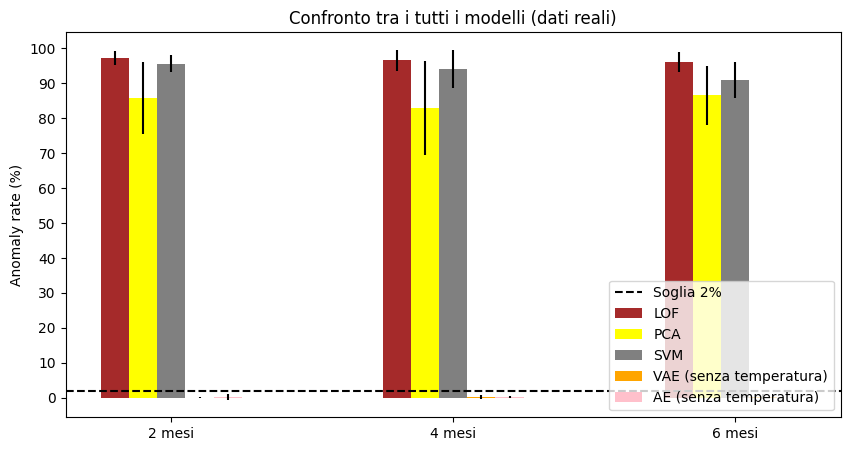

In [ ]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 110, step=10)
fig, ax = plt.subplots(figsize=(10, 5))
w = 0.1
ax.bar(x-2*w, real_mean_LOF_inc.values*100, width=w, yerr=real_std_LOF_inc*100, color="brown", label="LOF")
ax.bar(x-w, real_mean_PCA_inc.values*100, width=w, yerr=real_std_PCA_inc*100, color="yellow", label="PCA")
ax.bar(x, real_mean_SVM_inc.values*100, width=w, yerr=real_std_SVM_inc*100, color="gray", label="SVM")
ax.bar(x+w, real_mean_VAE_no_temp_inc.values*100, width=w, yerr=real_std_VAE_no_temp_inc*100, color="orange", label="VAE (senza temperatura)")
ax.bar(x+2*w, real_mean_AE_no_temp_inc.values*100, width=w, yerr=real_std_AE_no_temp_inc*100, color="pink", label="AE (senza temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i tutti i modelli (dati reali)")
plt.legend(loc="lower right")
plt.show()

In [ ]:
real_mean_VAE_no_temp_inc_full = VAE_no_temp_real_inc.groupby("window_size")["anomaly rate"].mean()
real_mean_AE_no_temp_inc_full = AE_no_temp_real_inc.groupby("window_size")["anomaly rate"].mean()

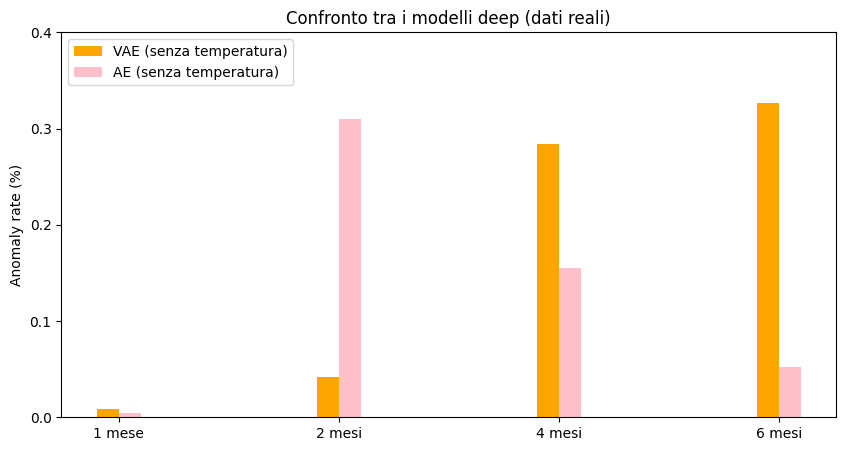

In [ ]:
labels = ["1 mese", "2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 0.5, step=0.1)
fig, ax = plt.subplots(figsize=(10, 5))
w = 0.1
ax.bar(x-w/2, real_mean_VAE_no_temp_inc_full.values*100, width=w, color="orange", label="VAE (senza temperatura)")
ax.bar(x+w/2, real_mean_AE_no_temp_inc_full.values*100, width=w, color="pink", label="AE (senza temperatura)")

# ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i modelli deep (dati reali)")
plt.legend(loc="upper left")
plt.show()

In [ ]:
VAE_no_temp_ridotto_fake_inc = VAE_no_temp_fake_inc[VAE_no_temp_fake_inc["window_size"] != 1]
AE_no_temp_ridotto_fake_inc = AE_no_temp_fake_inc[AE_no_temp_fake_inc["window_size"] != 1]

fake_mean_LOF_inc = LOF_fake_inc.groupby("window_size")["anomaly"].mean()
fake_mean_PCA_inc = PCA_fake_inc.groupby("window_size")["anomaly"].mean()
fake_mean_SVM_inc = SVM_fake_inc.groupby("window_size")["anomaly"].mean()

fake_mean_VAE_no_temp_inc = VAE_no_temp_ridotto_fake_inc.groupby("window_size")["anomaly"].mean()
fake_mean_AE_no_temp_inc = AE_no_temp_ridotto_fake_inc.groupby("window_size")["anomaly"].mean()

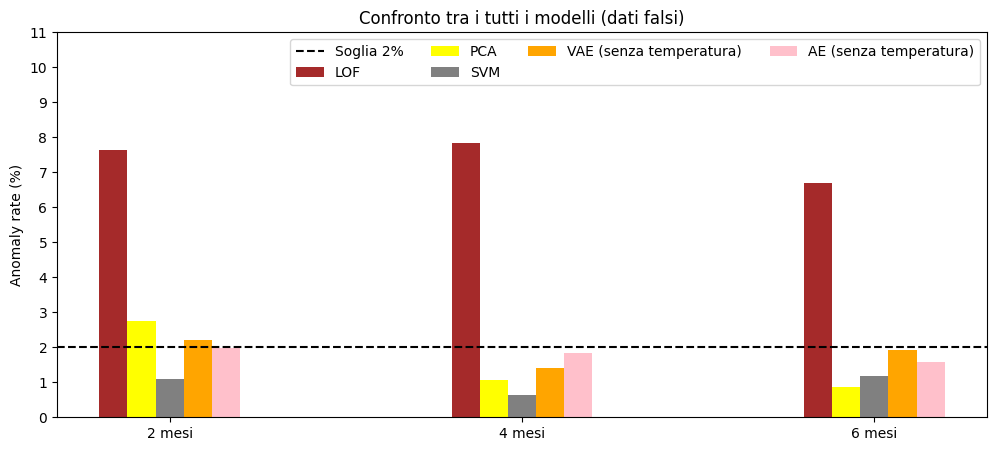

In [ ]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 12, step=1)
fig, ax = plt.subplots(figsize=(12, 5))
w = 0.08
ax.bar(x-2*w, fake_mean_LOF_inc.values*100, width=w, color="brown", label="LOF")
ax.bar(x-w, fake_mean_PCA_inc.values*100, width=w, color="yellow", label="PCA")
ax.bar(x, fake_mean_SVM_inc.values*100, width=w, color="gray", label="SVM")
ax.bar(x+w, fake_mean_VAE_no_temp_inc.values*100, width=w, color="orange", label="VAE (senza temperatura)")
ax.bar(x+2*w, fake_mean_AE_no_temp_inc.values*100, width=w, color="pink", label="AE (senza temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i tutti i modelli (dati falsi)")
plt.legend(ncol = 4)
# plt.ylim(0, 2.5)
plt.show()

# Dataset inclinometro (versione corretta)

In [ ]:
LOF_real_inc_v2 = pd.read_csv("/content/drive/MyDrive/real_inclinometri_LOF_v2.csv")
LOF_fake_inc_v2 = pd.read_csv("/content/drive/MyDrive/fake_inclinometri_LOF_v2.csv")

PCA_real_inc_v2 = pd.read_csv("/content/drive/MyDrive/real_inclinometri_PCA_v2.csv")
PCA_fake_inc_v2 = pd.read_csv("/content/drive/MyDrive/fake_inclinometri_PCA_v2.csv")

SVM_real_inc_v2 = pd.read_csv("/content/drive/MyDrive/real_inclinometri_SVM_v2.csv")
SVM_fake_inc_v2 = pd.read_csv("/content/drive/MyDrive/fake_inclinometri_SVM_v2.csv")

VAE_no_temp_real_inc_v2 = pd.read_csv("/content/drive/MyDrive/real_inclinometri_VAE_v2.csv")
VAE_no_temp_fake_inc_v2 = pd.read_csv("/content/drive/MyDrive/fake_inclinometri_VAE_v2.csv")

AE_no_temp_real_inc_v2 = pd.read_csv("/content/drive/MyDrive/real_inclinometri_AE_v2.csv")
AE_no_temp_fake_inc_v2 = pd.read_csv("/content/drive/MyDrive/fake_inclinometri_AE_v2.csv")

In [ ]:
VAE_no_temp_ridotto_inc_v2 = VAE_no_temp_real_inc_v2[VAE_no_temp_real_inc_v2["window_size"] != 1]
AE_no_temp_ridotto_inc_v2 = AE_no_temp_real_inc_v2[AE_no_temp_real_inc_v2["window_size"] != 1]

real_mean_LOF_inc_v2 = LOF_real_inc_v2.groupby("window_size")["anomaly rate"].mean()
real_mean_PCA_inc_v2 = PCA_real_inc_v2.groupby("window_size")["anomaly rate"].mean()
real_mean_SVM_inc_v2 = SVM_real_inc_v2.groupby("window_size")["anomaly rate"].mean()

real_mean_VAE_no_temp_inc_v2 = VAE_no_temp_ridotto_inc_v2.groupby("window_size")["anomaly rate"].mean()
real_mean_AE_no_temp_inc_v2 = AE_no_temp_ridotto_inc_v2.groupby("window_size")["anomaly rate"].mean()

real_std_LOF_inc_v2 = LOF_real_inc_v2.groupby("window_size")["anomaly rate"].std()
real_std_PCA_inc_v2 = PCA_real_inc_v2.groupby("window_size")["anomaly rate"].std()
real_std_SVM_inc_v2 = SVM_real_inc_v2.groupby("window_size")["anomaly rate"].std()

real_std_VAE_no_temp_inc_v2 = VAE_no_temp_ridotto_inc_v2.groupby("window_size")["anomaly rate"].std()
real_std_AE_no_temp_inc_v2 = AE_no_temp_ridotto_inc_v2.groupby("window_size")["anomaly rate"].std()

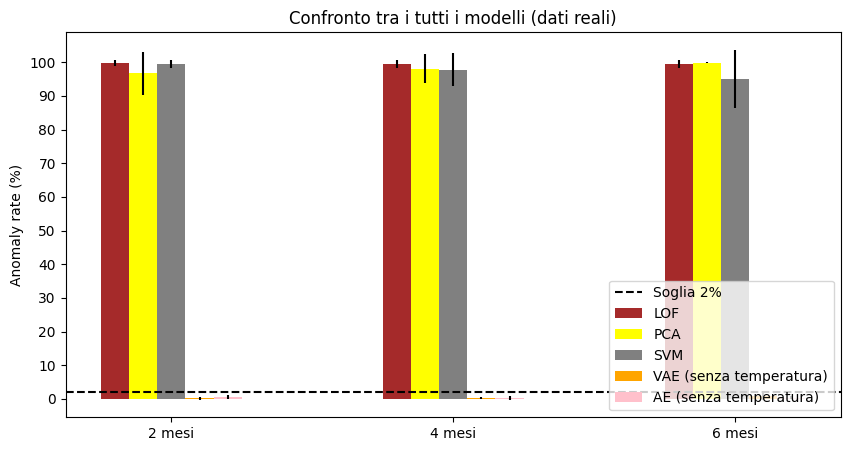

In [ ]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 110, step=10)
fig, ax = plt.subplots(figsize=(10, 5))
w = 0.1
ax.bar(x-2*w, real_mean_LOF_inc_v2.values*100, width=w, yerr=real_std_LOF_inc_v2*100, color="brown", label="LOF")
ax.bar(x-w, real_mean_PCA_inc_v2.values*100, width=w, yerr=real_std_PCA_inc_v2*100, color="yellow", label="PCA")
ax.bar(x, real_mean_SVM_inc_v2.values*100, width=w, yerr=real_std_SVM_inc_v2*100, color="gray", label="SVM")
ax.bar(x+w, real_mean_VAE_no_temp_inc_v2.values*100, width=w, yerr=real_std_VAE_no_temp_inc_v2*100, color="orange", label="VAE (senza temperatura)")
ax.bar(x+2*w, real_mean_AE_no_temp_inc_v2.values*100, width=w, yerr=real_std_AE_no_temp_inc_v2*100, color="pink", label="AE (senza temperatura)")

ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i tutti i modelli (dati reali)")
plt.legend(loc="lower right")
plt.show()

In [ ]:
real_mean_VAE_no_temp_inc_full_v2 = VAE_no_temp_real_inc_v2.groupby("window_size")["anomaly rate"].mean()
real_mean_AE_no_temp_inc_full_v2 = AE_no_temp_real_inc_v2.groupby("window_size")["anomaly rate"].mean()

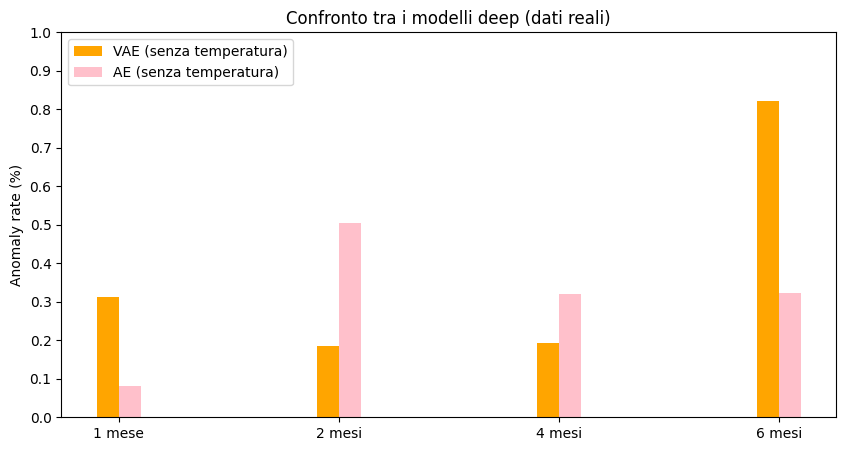

In [ ]:
labels = ["1 mese", "2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(0, 1.1, step=0.1)
fig, ax = plt.subplots(figsize=(10, 5))
w = 0.1
ax.bar(x-w/2, real_mean_VAE_no_temp_inc_full_v2.values*100, width=w, color="orange", label="VAE (senza temperatura)")
ax.bar(x+w/2, real_mean_AE_no_temp_inc_full_v2.values*100, width=w, color="pink", label="AE (senza temperatura)")

# ax.axhline(2, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Anomaly rate (%)")
plt.title("Confronto tra i modelli deep (dati reali)")
plt.legend(loc="upper left")
plt.show()

# Correlazione tra escursione termica e accuracy

In [3]:
url_no_temp = "https://drive.google.com/uc?id=1jerpsOqjogEnnriBkHOrDDEeh1wJry_o"
output_no_temp = "data_no_temperature.csv"
gdown.download(url_no_temp, output_no_temp)

url_temp = " https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH"
output_temp = "data_temperature.csv"
gdown.download(url_temp, output_temp)


df_temp = pd.read_csv("/content/data_temperature.csv", encoding = "utf-8")
df_temp["timestamp"] = pd.to_datetime(df_temp["timestamp"])
df_temp["timestamp"] = df_temp["timestamp"].dt.tz_localize(None)
df_temp = df_temp.sort_values("timestamp")

end_date = "2025-01-01"
df = df_temp[df_temp["timestamp"] < end_date]


daily_amp = df.groupby(df["timestamp"].dt.date)["temperatura"].agg(lambda x: x.max()- x.min())

monthly_amp_mean = daily_amp.groupby(pd.to_datetime(daily_amp.index).to_period("M")).mean()

print(monthly_amp_mean)


monthly_amp_mean = monthly_amp_mean.to_frame()
monthly_amp_mean = monthly_amp_mean.reset_index()
print(monthly_amp_mean.columns)

Downloading...
From: https://drive.google.com/uc?id=1jerpsOqjogEnnriBkHOrDDEeh1wJry_o
To: /content/data_no_temperature.csv
100%|██████████| 1.44M/1.44M [00:00<00:00, 185MB/s]
Downloading...
From:  https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH
To: /content/data_temperature.csv
100%|██████████| 1.66M/1.66M [00:00<00:00, 161MB/s]

timestamp
2024-01    4.087587
2024-02    5.145328
2024-03    5.137622
2024-04    6.739853
2024-05    6.228330
2024-06    6.726246
2024-07    7.300671
2024-08    7.355684
2024-09    5.781298
2024-10    4.820280
2024-11    4.619887
2024-12    4.026756
Freq: M, Name: temperatura, dtype: float64
Index(['timestamp', 'temperatura'], dtype='object')


In [4]:
monthly_amp_mean = monthly_amp_mean.sort_values('timestamp')
monthly_amp_mean['month_period'] = monthly_amp_mean['timestamp']
monthly_amp_mean['month_number'] = (
    (monthly_amp_mean['month_period'].dt.year - monthly_amp_mean['month_period'].dt.year.min()) * 12
    + (monthly_amp_mean['month_period'].dt.month - 1))
df_expanded = pd.concat([
    monthly_amp_mean.assign(block = monthly_amp_mean['month_number']),
    monthly_amp_mean.assign(block = monthly_amp_mean['month_number'] - 1)])


df_expanded = df_expanded[df_expanded['block'] >= 0]
block_amp_2m = (
    df_expanded
    .groupby('block')
    .agg(
        mean_amp = ('temperatura', 'mean'),
        timestamp_start = ('month_period', 'min'),
        timestamp_end = ('month_period', 'max')
        )
    .reset_index(drop=True))


block_amp_2m = block_amp_2m.iloc[:-1]
print(block_amp_2m)




monthly_amp_mean = monthly_amp_mean.sort_values('timestamp')
monthly_amp_mean['month_period'] = monthly_amp_mean['timestamp']
monthly_amp_mean['month_number'] = (
    (monthly_amp_mean['month_period'].dt.year - monthly_amp_mean['month_period'].dt.year.min()) * 12
    + (monthly_amp_mean['month_period'].dt.month - 1))

window_size = 4 # finestra di 4 mesi

df_list = [
    monthly_amp_mean.assign(block = monthly_amp_mean['month_number'] - shift)
    for shift in range(window_size)]

df_expanded = pd.concat(df_list)
df_expanded = df_expanded[df_expanded['block'] >= 0]
block_amp_4m = (
    df_expanded
    .groupby('block')
    .agg(
        mean_amp = ('temperatura', 'mean'),
        timestamp_start = ('month_period', 'min'),
        timestamp_end = ('month_period', 'max')
        )
    .reset_index(drop=True))


block_amp_4m = block_amp_4m.iloc[:-3]
print("\n", block_amp_4m)





monthly_amp_mean = monthly_amp_mean.sort_values('timestamp')
monthly_amp_mean['month_period'] = monthly_amp_mean['timestamp']
monthly_amp_mean['month_number'] = (
    (monthly_amp_mean['month_period'].dt.year - monthly_amp_mean['month_period'].dt.year.min()) * 12
    + (monthly_amp_mean['month_period'].dt.month - 1))

window_size = 6 # finestra di 4 mesi

df_list = [
    monthly_amp_mean.assign(block = monthly_amp_mean['month_number'] - shift)
    for shift in range(window_size)]

df_expanded = pd.concat(df_list)
df_expanded = df_expanded[df_expanded['block'] >= 0]
block_amp_6m = (
    df_expanded
    .groupby('block')
    .agg(
        mean_amp = ('temperatura', 'mean'),
        timestamp_start = ('month_period', 'min'),
        timestamp_end = ('month_period', 'max')
        )
    .reset_index(drop=True))


block_amp_6m = block_amp_6m.iloc[:-5]
print("\n", block_amp_6m)

    mean_amp timestamp_start timestamp_end
0   4.616458         2024-01       2024-02
1   5.141475         2024-02       2024-03
2   5.938737         2024-03       2024-04
3   6.484091         2024-04       2024-05
4   6.477288         2024-05       2024-06
5   7.013459         2024-06       2024-07
6   7.328178         2024-07       2024-08
7   6.568491         2024-08       2024-09
8   5.300789         2024-09       2024-10
9   4.720083         2024-10       2024-11
10  4.323322         2024-11       2024-12

    mean_amp timestamp_start timestamp_end
0  5.277597         2024-01       2024-04
1  5.812783         2024-02       2024-05
2  6.208013         2024-03       2024-06
3  6.748775         2024-04       2024-07
4  6.902733         2024-05       2024-08
5  6.790975         2024-06       2024-09
6  6.314483         2024-07       2024-10
7  5.644287         2024-08       2024-11
8  4.812055         2024-09       2024-12

    mean_amp timestamp_start timestamp_end
0  5.677494       

In [6]:
lof_2m = LOF_real[LOF_real["window_size"] == 2]
# print(lof_2m)

lof2 = lof_2m.reset_index(drop=True)
blk2 = block_amp_2m.reset_index(drop=True)

df_combined_lof_2m = pd.DataFrame({
    'anomaly_rate': lof2['anomaly rate 0.01'],
    'mean_amp': blk2['mean_amp']})

corr_value_lof_2m = df_combined_lof_2m['anomaly_rate'].corr(df_combined_lof_2m['mean_amp'])
print("Correlazione LOF 2 mesi:", corr_value_lof_2m)





lof_4m = LOF_real[LOF_real["window_size"] == 4]
# print(lof_4m)

lof4 = lof_4m.reset_index(drop=True)
blk4 = block_amp_4m.reset_index(drop=True)

df_combined_lof_4m = pd.DataFrame({
    'anomaly_rate': lof4['anomaly rate 0.01'],
    'mean_amp': blk4['mean_amp']})

corr_value_lof_4m = df_combined_lof_4m['anomaly_rate'].corr(df_combined_lof_4m['mean_amp'])
print("Correlazione LOF 4 mesi:", corr_value_lof_4m)




lof_6m = LOF_real[LOF_real["window_size"] == 6]
# print(lof_6m)

lof6 = lof_6m.reset_index(drop=True)
blk6 = block_amp_6m.reset_index(drop=True)

df_combined_lof_6m = pd.DataFrame({
    'anomaly_rate': lof6['anomaly rate 0.01'],
    'mean_amp': blk6['mean_amp']})

corr_value_lof_6m = df_combined_lof_6m['anomaly_rate'].corr(df_combined_lof_6m['mean_amp'])
print("Correlazione LOF 6 mesi:", corr_value_lof_6m)

Correlazione LOF 2 mesi: -0.5747538901950681
Correlazione LOF 4 mesi: -0.3311644277956706
Correlazione LOF 6 mesi: 0.025255312033822346


In [7]:
dbscan_2m = DBSCAN_real[DBSCAN_real["window_size"] == 2]
# print(dbscan_2m)

dbscan2 = dbscan_2m.reset_index(drop=True)
blk2 = block_amp_2m.reset_index(drop=True)

df_combined_dbscan_2m = pd.DataFrame({
    'anomaly_rate': dbscan2['anomaly rate'],
    'mean_amp': blk2['mean_amp']})

corr_value_dbscan_2m = df_combined_dbscan_2m['anomaly_rate'].corr(df_combined_dbscan_2m['mean_amp'])
print("Correlazione DBSCAN 2 mesi:", corr_value_dbscan_2m)





dbscan_4m = DBSCAN_real[DBSCAN_real["window_size"] == 4]
# print(dbscan_4m)

dbscan4 = dbscan_4m.reset_index(drop=True)
blk4 = block_amp_4m.reset_index(drop=True)

df_combined_dbscan_4m = pd.DataFrame({
    'anomaly_rate': dbscan4['anomaly rate'],
    'mean_amp': blk4['mean_amp']})

corr_value_dbscan_4m = df_combined_dbscan_4m['anomaly_rate'].corr(df_combined_dbscan_4m['mean_amp'])
print("Correlazione DBSCAN 4 mesi:", corr_value_dbscan_4m)





dbscan_6m = DBSCAN_real[DBSCAN_real["window_size"] == 6]
# print(dbscan_6m)

dbscan6 = dbscan_6m.reset_index(drop=True)
blk6 = block_amp_6m.reset_index(drop=True)

df_combined_dbscan_6m = pd.DataFrame({
    'anomaly_rate': dbscan6['anomaly rate'],
    'mean_amp': blk6['mean_amp']})

corr_value_dbscan_6m = df_combined_dbscan_6m['anomaly_rate'].corr(df_combined_dbscan_6m['mean_amp'])
print("Correlazione DBSCAN 6 mesi:", corr_value_dbscan_6m)

Correlazione DBSCAN 2 mesi: -0.4626746084721961
Correlazione DBSCAN 4 mesi: -0.324332864425136
Correlazione DBSCAN 6 mesi: -0.3604983724155987


In [8]:
pca_2m = PCA_real[PCA_real["window_size"] == 2]
# print(pca_2m)

pca2 = pca_2m.reset_index(drop=True)
blk2 = block_amp_2m.reset_index(drop=True)

df_combined_pca_2m = pd.DataFrame({
    'anomaly_rate': pca2['anomaly rate'],
    'mean_amp': blk2['mean_amp']})

corr_value_pca_2m = df_combined_pca_2m['anomaly_rate'].corr(df_combined_pca_2m['mean_amp'])
print("Correlazione PCA 2 mesi:", corr_value_pca_2m)




pca_4m = PCA_real[PCA_real["window_size"] == 4]
# print(pca_4m)

pca4 = pca_4m.reset_index(drop=True)
blk4 = block_amp_4m.reset_index(drop=True)

df_combined_pca_4m = pd.DataFrame({
    'anomaly_rate': pca4['anomaly rate'],
    'mean_amp': blk4['mean_amp']})

corr_value_pca_4m = df_combined_pca_4m['anomaly_rate'].corr(df_combined_pca_4m['mean_amp'])
print("Correlazione PCA 4 mesi:", corr_value_pca_4m)





pca_6m = PCA_real[PCA_real["window_size"] == 6]
# print(pca_6m)

pca6 = pca_6m.reset_index(drop=True)
blk6 = block_amp_6m.reset_index(drop=True)

df_combined_pca_6m = pd.DataFrame({
    'anomaly_rate': pca6['anomaly rate'],
    'mean_amp': blk6['mean_amp']})

corr_value_pca_6m = df_combined_pca_6m['anomaly_rate'].corr(df_combined_pca_6m['mean_amp'])
print("Correlazione PCA 6 mesi:", corr_value_pca_6m)

Correlazione PCA 2 mesi: -0.10103896476326743
Correlazione PCA 4 mesi: 0.02547517209027332
Correlazione PCA 6 mesi: -0.21692083079669003


In [9]:
if_2m = IF_real[IF_real["window_size"] == 2]
# print(if_2m)

if2 = if_2m.reset_index(drop=True)
blk2 = block_amp_2m.reset_index(drop=True)

df_combined_if_2m = pd.DataFrame({
    'anomaly_rate': if2['anomaly rate'],
    'mean_amp': blk2['mean_amp']})

corr_value_if_2m = df_combined_if_2m['anomaly_rate'].corr(df_combined_if_2m['mean_amp'])
print("Correlazione Isolation Forest 2 mesi:", corr_value_if_2m)




if_4m = IF_real[IF_real["window_size"] == 4]
# print(if_4m)

if4 = if_4m.reset_index(drop=True)
blk4 = block_amp_4m.reset_index(drop=True)

df_combined_if_4m = pd.DataFrame({
    'anomaly_rate': if4['anomaly rate'],
    'mean_amp': blk4['mean_amp']})

corr_value_if_4m = df_combined_if_4m['anomaly_rate'].corr(df_combined_if_4m['mean_amp'])
print("Correlazione Isolation Forest 4 mesi:", corr_value_if_4m)





if_6m = IF_real[IF_real["window_size"] == 6]
# print(if_6m)

if6 = if_6m.reset_index(drop=True)
blk6 = block_amp_6m.reset_index(drop=True)

df_combined_if_6m = pd.DataFrame({
    'anomaly_rate': if6['anomaly rate'],
    'mean_amp': blk6['mean_amp']})

corr_value_if_6m = df_combined_if_6m['anomaly_rate'].corr(df_combined_if_6m['mean_amp'])
print("Correlazione Isolation Forest 6 mesi:", corr_value_if_6m)

Correlazione Isolation Forest 2 mesi: -0.5784492108067208
Correlazione Isolation Forest 4 mesi: -0.38831071404069706
Correlazione Isolation Forest 6 mesi: -0.44228389319220063


In [10]:
svm_2m = SVM_real[SVM_real["window_size"] == 2]
# print(svm_2m)

svm2 = svm_2m.reset_index(drop=True)
blk2 = block_amp_2m.reset_index(drop=True)

df_combined_svm_2m = pd.DataFrame({
    'anomaly_rate': svm2['anomaly rate'],
    'mean_amp': blk2['mean_amp']})

corr_value_svm_2m = df_combined_svm_2m['anomaly_rate'].corr(df_combined_svm_2m['mean_amp'])
print("Correlazione SVM 2 mesi:", corr_value_svm_2m)




svm_4m = SVM_real[SVM_real["window_size"] == 4]
# print(svm_4m)

svm4 = svm_4m.reset_index(drop=True)
blk4 = block_amp_4m.reset_index(drop=True)

df_combined_svm_4m = pd.DataFrame({
    'anomaly_rate': svm4['anomaly rate'],
    'mean_amp': blk4['mean_amp']})

corr_value_svm_4m = df_combined_svm_4m['anomaly_rate'].corr(df_combined_svm_4m['mean_amp'])
print("Correlazione SVM 4 mesi:", corr_value_svm_4m)





svm_6m = SVM_real[SVM_real["window_size"] == 6]
# print(svm_6)

svm6 = svm_6m.reset_index(drop=True)
blk6 = block_amp_6m.reset_index(drop=True)

df_combined_svm_6m = pd.DataFrame({
    'anomaly_rate': svm6['anomaly rate'],
    'mean_amp': blk6['mean_amp']})

corr_value_svm_6m = df_combined_svm_6m['anomaly_rate'].corr(df_combined_svm_6m['mean_amp'])
print("Correlazione SVM 6 mesi:", corr_value_svm_6m)

Correlazione SVM 2 mesi: -0.6985625420443714
Correlazione SVM 4 mesi: -0.6303588701470753
Correlazione SVM 6 mesi: -0.522374451182511


In [11]:
cvae_beta_1_2m = CVAE_beta_1_real[CVAE_beta_1_real["window_size"] == 2]
# print(cvae_beta_1_2m)

cvae_beta_1_2 = cvae_beta_1_2m.reset_index(drop=True)
blk2 = block_amp_2m.reset_index(drop=True)

df_combined_cvae_beta_1_2m = pd.DataFrame({
    'anomaly_rate': cvae_beta_1_2['anomaly rate'],
    'mean_amp': blk2['mean_amp']})

corr_value_cvae_beta_1_2m = df_combined_cvae_beta_1_2m['anomaly_rate'].corr(df_combined_cvae_beta_1_2m['mean_amp'])
print("Correlazione CVAE (beta = 1) 2 mesi:", corr_value_cvae_beta_1_2m)




cvae_beta_1_4m = CVAE_beta_1_real[CVAE_beta_1_real["window_size"] == 4]
# print(cvae_beta_1_4m)

cvae_beta_1_4 = cvae_beta_1_4m.reset_index(drop=True)
blk4 = block_amp_4m.reset_index(drop=True)

df_combined_cvae_beta_1_4m = pd.DataFrame({
    'anomaly_rate': cvae_beta_1_4['anomaly rate'],
    'mean_amp': blk4['mean_amp']})

corr_value_cvae_beta_1_4m = df_combined_cvae_beta_1_4m['anomaly_rate'].corr(df_combined_cvae_beta_1_4m['mean_amp'])
print("Correlazione CVAE (beta = 1) 4 mesi:", corr_value_cvae_beta_1_4m)





cvae_beta_1_6m = CVAE_beta_1_real[CVAE_beta_1_real["window_size"] == 6]
# print(cvae_beta_1_6m)

cvae_beta_1_6 = cvae_beta_1_6m.reset_index(drop=True)
blk6 = block_amp_6m.reset_index(drop=True)

df_combined_cvae_beta_1_6m = pd.DataFrame({
    'anomaly_rate': cvae_beta_1_6['anomaly rate'],
    'mean_amp': blk6['mean_amp']})

corr_value_cvae_beta_1_6m = df_combined_cvae_beta_1_6m['anomaly_rate'].corr(df_combined_cvae_beta_1_6m['mean_amp'])
print("Correlazione CVAE (beta = 1) 6 mesi:", corr_value_cvae_beta_1_6m)

Correlazione CVAE (beta = 1) 2 mesi: -0.14352808639055675
Correlazione CVAE (beta = 1) 4 mesi: -0.21628995321024716
Correlazione CVAE (beta = 1) 6 mesi: -0.4648968420520479


In [12]:
cvae_beta_001_2m = CVAE_beta_001_real[CVAE_beta_001_real["window_size"] == 2]
# print(cvae_beta_001_2m)

cvae_beta_001_2 = cvae_beta_001_2m.reset_index(drop=True)
blk2 = block_amp_2m.reset_index(drop=True)

df_combined_cvae_beta_001_2m = pd.DataFrame({
    'anomaly_rate': cvae_beta_001_2['anomaly rate'],
    'mean_amp': blk2['mean_amp']})

corr_value_cvae_beta_001_2m = df_combined_cvae_beta_001_2m['anomaly_rate'].corr(df_combined_cvae_beta_001_2m['mean_amp'])
print("Correlazione CVAE (beta = 0.01) 2 mesi:", corr_value_cvae_beta_001_2m)





cvae_beta_001_4m = CVAE_beta_001_real[CVAE_beta_001_real["window_size"] == 4]
# print(cvae_beta_001_4m)

cvae_beta_001_4 = cvae_beta_001_4m.reset_index(drop=True)
blk4 = block_amp_4m.reset_index(drop=True)

df_combined_cvae_beta_001_4m = pd.DataFrame({
    'anomaly_rate': cvae_beta_001_4['anomaly rate'],
    'mean_amp': blk4['mean_amp']})

corr_value_cvae_beta_001_4m = df_combined_cvae_beta_001_4m['anomaly_rate'].corr(df_combined_cvae_beta_001_4m['mean_amp'])
print("Correlazione CVAE (beta = 0.01) 4 mesi:", corr_value_cvae_beta_001_4m)





cvae_beta_001_6m = CVAE_beta_001_real[CVAE_beta_001_real["window_size"] == 6]
# print(cvae_beta_001_6m)

cvae_beta_001_6 = cvae_beta_001_6m.reset_index(drop=True)
blk6 = block_amp_6m.reset_index(drop=True)

df_combined_cvae_beta_001_6m = pd.DataFrame({
    'anomaly_rate': cvae_beta_001_6['anomaly rate'],
    'mean_amp': blk6['mean_amp']})

corr_value_cvae_beta_001_6m = df_combined_cvae_beta_001_6m['anomaly_rate'].corr(df_combined_cvae_beta_001_6m['mean_amp'])
print("Correlazione CVAE (beta = 0.01) 6 mesi:", corr_value_cvae_beta_001_6m)

Correlazione CVAE (beta = 0.01) 2 mesi: -0.5447865843206858
Correlazione CVAE (beta = 0.01) 4 mesi: -0.1364133665227891
Correlazione CVAE (beta = 0.01) 6 mesi: -0.6218081675845796


In [13]:
vae_no_temp_2m = VAE_no_temp_real[VAE_no_temp_real["window_size"] == 2]
# print(vae_no_temp_2m)

vae_no_temp_2 = vae_no_temp_2m.reset_index(drop=True)
blk2 = block_amp_2m.reset_index(drop=True)

df_combined_vae_no_temp_2m = pd.DataFrame({
    'anomaly_rate': vae_no_temp_2['anomaly rate'],
    'mean_amp': blk2['mean_amp']})

corr_value_vae_no_temp_2m = df_combined_vae_no_temp_2m['anomaly_rate'].corr(df_combined_vae_no_temp_2m['mean_amp'])
print("Correlazione VAE (senza temperatura) 2 mesi:", corr_value_vae_no_temp_2m)





vae_no_temp_4m = VAE_no_temp_real[VAE_no_temp_real["window_size"] == 4]
# print(vae_no_temp_4m)

vae_no_temp_4 = vae_no_temp_4m.reset_index(drop=True)
blk4 = block_amp_4m.reset_index(drop=True)

df_combined_vae_no_temp_4m = pd.DataFrame({
    'anomaly_rate': vae_no_temp_4['anomaly rate'],
    'mean_amp': blk4['mean_amp']})

corr_value_vae_no_temp_4m = df_combined_vae_no_temp_4m['anomaly_rate'].corr(df_combined_vae_no_temp_4m['mean_amp'])
print("Correlazione VAE (senza temperatura) 4 mesi:", corr_value_vae_no_temp_4m)




vae_no_temp_6m = VAE_no_temp_real[VAE_no_temp_real["window_size"] == 6]
# print(vae_no_temp_6m)

vae_no_temp_6 = vae_no_temp_6m.reset_index(drop=True)
blk6 = block_amp_6m.reset_index(drop=True)

df_combined_vae_no_temp_6m = pd.DataFrame({
    'anomaly_rate': vae_no_temp_6['anomaly rate'],
    'mean_amp': blk6['mean_amp']})

corr_value_vae_no_temp_6m = df_combined_vae_no_temp_6m['anomaly_rate'].corr(df_combined_vae_no_temp_6m['mean_amp'])
print("Correlazione VAE (senza temperatura) 6 mesi:", corr_value_vae_no_temp_6m)

Correlazione VAE (senza temperatura) 2 mesi: -0.20525397921389157
Correlazione VAE (senza temperatura) 4 mesi: 0.03683742913294567
Correlazione VAE (senza temperatura) 6 mesi: -0.3962207155505169


In [14]:
vae_temp_2m = VAE_temp_real[VAE_temp_real["window_size"] == 2]
# print(vae_temp_2m)

vae_temp_2 = vae_temp_2m.reset_index(drop=True)
blk2 = block_amp_2m.reset_index(drop=True)

df_combined_vae_temp_2m = pd.DataFrame({
    'anomaly_rate': vae_temp_2['anomaly rate'],
    'mean_amp': blk2['mean_amp']})

corr_value_vae_temp_2m = df_combined_vae_temp_2m['anomaly_rate'].corr(df_combined_vae_temp_2m['mean_amp'])
print("Correlazione VAE (con temperatura) 2 mesi:", corr_value_vae_temp_2m)








vae_temp_4m = VAE_temp_real[VAE_temp_real["window_size"] == 4]
# print(vae_temp_4m)

vae_temp_4 = vae_temp_4m.reset_index(drop=True)
blk4 = block_amp_4m.reset_index(drop=True)

df_combined_vae_temp_4m = pd.DataFrame({
    'anomaly_rate': vae_temp_4['anomaly rate'],
    'mean_amp': blk4['mean_amp']})

corr_value_vae_temp_4m = df_combined_vae_temp_4m['anomaly_rate'].corr(df_combined_vae_temp_4m['mean_amp'])
print("Correlazione VAE (con temperatura) 4 mesi:", corr_value_vae_temp_4m)







vae_temp_6m = VAE_temp_real[VAE_temp_real["window_size"] == 6]
# print(vae_temp_6m)

vae_temp_6 = vae_temp_6m.reset_index(drop=True)
blk6 = block_amp_6m.reset_index(drop=True)

df_combined_vae_temp_6m = pd.DataFrame({
    'anomaly_rate': vae_temp_6['anomaly rate'],
    'mean_amp': blk6['mean_amp']})

corr_value_vae_temp_6m = df_combined_vae_temp_6m['anomaly_rate'].corr(df_combined_vae_temp_6m['mean_amp'])
print("Correlazione VAE (con temperatura) 6 mesi:", corr_value_vae_temp_6m)

Correlazione VAE (con temperatura) 2 mesi: -0.24070981205224917
Correlazione VAE (con temperatura) 4 mesi: 0.16473380961835696
Correlazione VAE (con temperatura) 6 mesi: -0.3771574516649067


In [15]:
ae_no_temp_2m = AE_no_temp_real[AE_no_temp_real["window_size"] == 2]
# print(ae_no_temp_2m)

ae_no_temp_2 = ae_no_temp_2m.reset_index(drop=True)
blk2 = block_amp_2m.reset_index(drop=True)

df_combined_ae_no_temp_2m = pd.DataFrame({
    'anomaly_rate': ae_no_temp_2['anomaly rate'],
    'mean_amp': blk2['mean_amp']})

corr_value_ae_no_temp_2m = df_combined_ae_no_temp_2m['anomaly_rate'].corr(df_combined_ae_no_temp_2m['mean_amp'])
print("Correlazione AE (senza temperatura) 2 mesi:", corr_value_ae_no_temp_2m)






ae_no_temp_4m = AE_no_temp_real[AE_no_temp_real["window_size"] == 4]
# print(ae_no_temp_4m)

ae_no_temp_4 = ae_no_temp_4m.reset_index(drop=True)
blk4 = block_amp_4m.reset_index(drop=True)

df_combined_ae_no_temp_4m = pd.DataFrame({
    'anomaly_rate': ae_no_temp_4['anomaly rate'],
    'mean_amp': blk4['mean_amp']})

corr_value_ae_no_temp_4m = df_combined_ae_no_temp_4m['anomaly_rate'].corr(df_combined_ae_no_temp_4m['mean_amp'])
print("Correlazione AE (senza temperatura) 4 mesi:", corr_value_ae_no_temp_4m)




ae_no_temp_6m = AE_no_temp_real[AE_no_temp_real["window_size"] == 6]
# print(ae_no_temp_6m)

ae_no_temp_6 = ae_no_temp_6m.reset_index(drop=True)
blk6 = block_amp_6m.reset_index(drop=True)

df_combined_ae_no_temp_6m = pd.DataFrame({
    'anomaly_rate': ae_no_temp_6['anomaly rate'],
    'mean_amp': blk6['mean_amp']})

corr_value_ae_no_temp_6m = df_combined_ae_no_temp_6m['anomaly_rate'].corr(df_combined_ae_no_temp_6m['mean_amp'])
print("Correlazione AE (senza temperatura) 6 mesi:", corr_value_ae_no_temp_6m)

Correlazione AE (senza temperatura) 2 mesi: -0.010080927653337787
Correlazione AE (senza temperatura) 4 mesi: -0.14912058058204983
Correlazione AE (senza temperatura) 6 mesi: -0.056385614810075285


In [16]:
ae_temp_2m = AE_temp_real[AE_temp_real["window_size"] == 2]
# print(ae_temp_2m)

ae_temp_2 = ae_temp_2m.reset_index(drop=True)
blk2 = block_amp_2m.reset_index(drop=True)

df_combined_ae_temp_2m = pd.DataFrame({
    'anomaly_rate': ae_temp_2['anomaly rate'],
    'mean_amp': blk2['mean_amp']})

corr_value_ae_temp_2m = df_combined_ae_temp_2m['anomaly_rate'].corr(df_combined_ae_temp_2m['mean_amp'])
print("Correlazione AE (con temperatura) 2 mesi:", corr_value_ae_temp_2m)



ae_temp_4m = AE_temp_real[AE_temp_real["window_size"] == 4]
# print(ae_temp_4m)

ae_temp_4 = ae_temp_4m.reset_index(drop=True)
blk4 = block_amp_4m.reset_index(drop=True)

df_combined_ae_temp_4m = pd.DataFrame({
    'anomaly_rate': ae_temp_4['anomaly rate'],
    'mean_amp': blk4['mean_amp']})

corr_value_ae_temp_4m = df_combined_ae_temp_4m['anomaly_rate'].corr(df_combined_ae_temp_4m['mean_amp'])
print("Correlazione AE (con temperatura) 4 mesi:", corr_value_ae_temp_4m)





ae_temp_6m = AE_temp_real[AE_temp_real["window_size"] == 6]
# print(ae_temp_6m)

ae_temp_6 = ae_temp_6m.reset_index(drop=True)
blk6 = block_amp_6m.reset_index(drop=True)

df_combined_ae_temp_6m = pd.DataFrame({
    'anomaly_rate': ae_temp_6['anomaly rate'],
    'mean_amp': blk6['mean_amp']})

corr_value_ae_temp_6m = df_combined_ae_temp_6m['anomaly_rate'].corr(df_combined_ae_temp_6m['mean_amp'])
print("Correlazione AE (con temperatura) 6 mesi:", corr_value_ae_temp_6m)

Correlazione AE (con temperatura) 2 mesi: -0.13898809465625964
Correlazione AE (con temperatura) 4 mesi: -0.1295889801987702
Correlazione AE (con temperatura) 6 mesi: -0.6206204307474882


In [24]:
corr_lof = [corr_value_lof_2m, corr_value_lof_4m, corr_value_lof_6m]
corr_dbscan = [corr_value_dbscan_2m, corr_value_dbscan_4m, corr_value_dbscan_6m]
corr_pca = [corr_value_pca_2m, corr_value_pca_4m, corr_value_pca_6m]
corr_if = [corr_value_if_2m, corr_value_if_4m, corr_value_if_6m]
corr_svm = [corr_value_svm_2m, corr_value_svm_4m, corr_value_svm_6m]
corr_CVAE_beta_1 = [corr_value_cvae_beta_1_2m, corr_value_cvae_beta_1_4m, corr_value_cvae_beta_1_6m]
corr_CVAE_beta_001 = [corr_value_cvae_beta_001_2m, corr_value_cvae_beta_001_4m, corr_value_cvae_beta_001_6m]
corr_VAE_no_temp = [corr_value_vae_no_temp_2m, corr_value_vae_no_temp_4m, corr_value_vae_no_temp_6m]
corr_VAE_temp = [corr_value_vae_temp_2m, corr_value_vae_temp_4m, corr_value_vae_temp_6m]
corr_AE_no_temp = [corr_value_ae_no_temp_2m, corr_value_ae_no_temp_4m, corr_value_ae_no_temp_6m]
corr_AE_temp = [corr_value_ae_temp_2m, corr_value_ae_temp_4m, corr_value_ae_temp_6m]

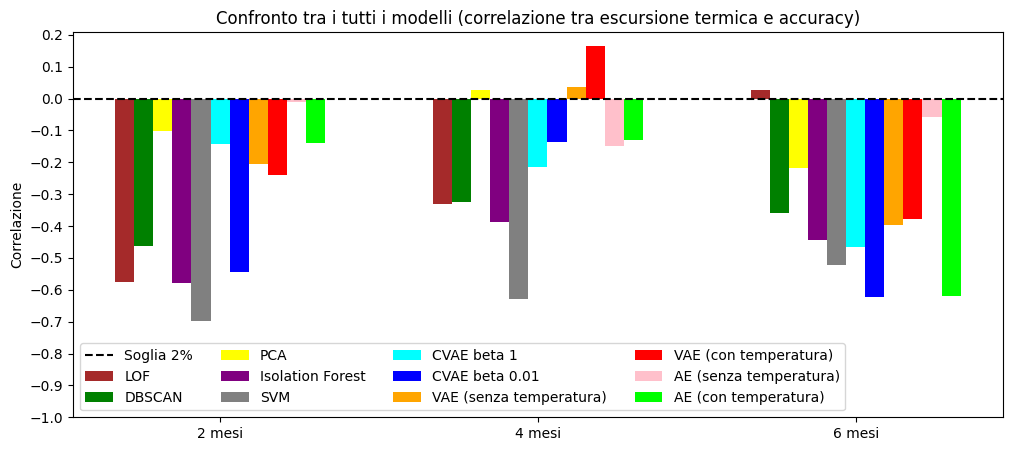

In [32]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
x = np.arange(len(labels))
y = np.arange(-1, 0.3, step=0.1)
fig, ax = plt.subplots(figsize=(12, 5))
w = 0.06

ax.bar(x-5*w, corr_lof, width=w, color="brown", label="LOF")
ax.bar(x-4*w, corr_dbscan, width=w, color="green", label="DBSCAN")
ax.bar(x-3*w, corr_pca, width=w, color="yellow", label="PCA")
ax.bar(x-2*w, corr_if, width=w, color="purple", label="Isolation Forest")
ax.bar(x-w, corr_svm, width=w, color="gray", label="SVM")
ax.bar(x, corr_CVAE_beta_1, width=w, color="aqua", label="CVAE beta 1")
ax.bar(x+w, corr_CVAE_beta_001, width=w, color="blue", label="CVAE beta 0.01")
ax.bar(x+2*w, corr_VAE_no_temp, width=w, color="orange", label="VAE (senza temperatura)")
ax.bar(x+3*w, corr_VAE_temp, width=w, color="red", label="VAE (con temperatura)")
ax.bar(x+4*w, corr_AE_no_temp, width=w, color="pink", label="AE (senza temperatura)")
ax.bar(x+5*w, corr_AE_temp, width=w, color="lime", label="AE (con temperatura)")

ax.axhline(0, color="black", linestyle="--", label="Soglia 2%")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)
ax.set_ylabel("Correlazione")
plt.title("Confronto tra i tutti i modelli (correlazione tra escursione termica e accuracy)")
plt.legend(ncol = 4)
plt.show()